# HR-agency data exploration

## Data download and initial operations

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# download data
data = pd.read_csv('data/ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Information on nan values:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


No nan values found.

Remove non-informative features:

In [4]:
data = data.drop(['Unnamed: 0'], axis=1)

Find duplicates:

In [5]:
print(f'{data[data.duplicated() == True].shape[0]} duplicates found')

42 duplicates found


Remove duplicates:

In [6]:
data = data.drop_duplicates(subset=data.columns)
data.shape

(565, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    int64 
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.0+ KB


Statistics of numerical features:

In [8]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,565.000000,5.650000e+02,565.000000,565.000000
mean,2021.364602,3.381160e+05,110610.343363,69.911504
std,0.698138,1.599879e+06,72280.702792,40.900666
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.700000e+04,60757.000000,50.000000
50%,2021.000000,1.109250e+05,100000.000000,100.000000
75%,2022.000000,1.650000e+05,150000.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


Statistics of categorical features:

In [9]:
data.describe(exclude=np.number)

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,565,565,565,565,565,565,565
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,243,546,130,359,295,318,290


***

## Visual data analysis

### Visual analysis of numerical features

#### *Work year* feature:

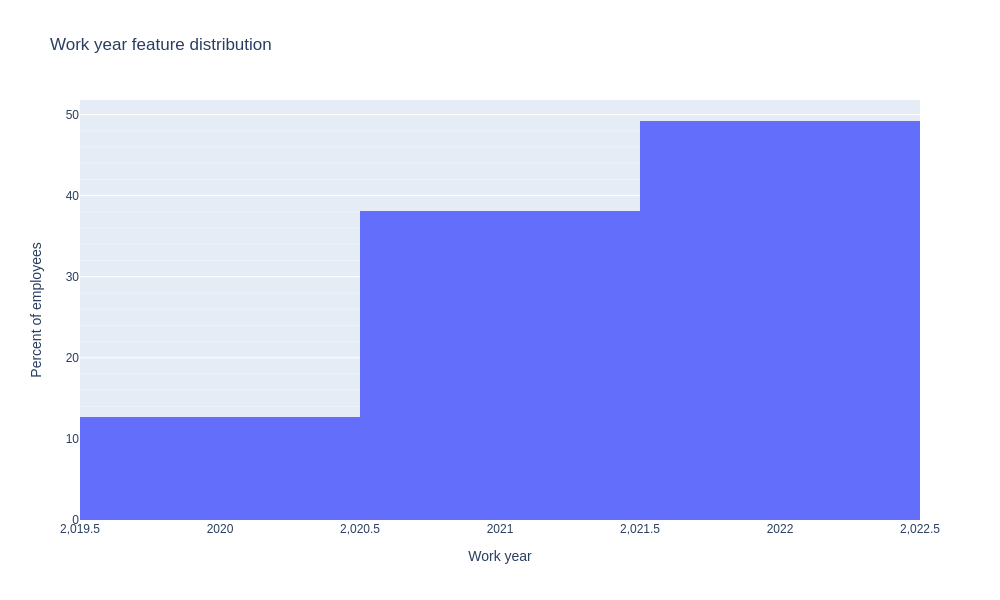

In [10]:
fig_work_year = px.histogram(
    data,
    x='work_year',
    #nbins=3,
    histnorm='percent',
    height=600,
    width=1000,
    title="Work year feature distribution"
)
fig_work_year.update_layout(showlegend=False)
fig_work_year.update_yaxes(minor_showgrid=True)
fig_work_year.layout.xaxis.title.text = 'Work year'
fig_work_year.layout.yaxis.title.text = 'Percent of employees'
#fig_work_year.write_html('images/work_year.html')
fig_work_year.write_image('images/work_year.png')
fig_work_year.show('png')

In [11]:
data['work_year'].describe().round(2)

count     565.00
mean     2021.36
std         0.70
min      2020.00
25%      2021.00
50%      2021.00
75%      2022.00
max      2022.00
Name: work_year, dtype: float64

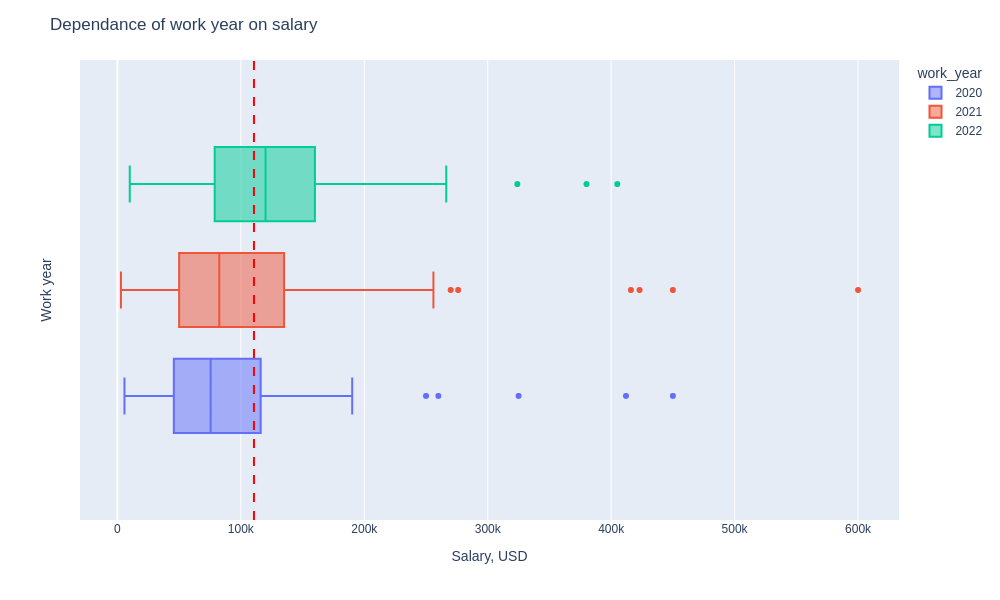

In [12]:
fig_work_salary = px.box(
    data,
    x='salary_in_usd',
    color='work_year',
    points='outliers'
)

fig_work_salary.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text="Dependance of work year on salary"
)

fig_work_salary.add_vline(data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig_work_salary.update_xaxes(title_text="Salary, USD")

fig_work_salary.update_yaxes(title_text="Work year")
fig_work_salary.update(layout_showlegend=True)
fig_work_salary.write_image('images/work_salary.png')
fig_work_salary.show('png')

Visual analysis shows that salary depends on work year.

#### *Salary_in_usd* feature:

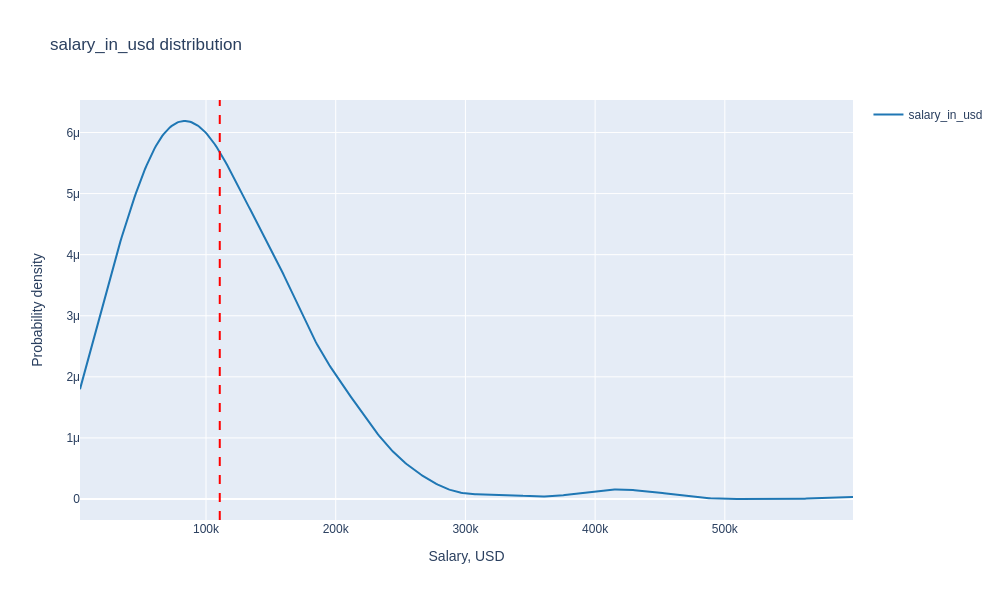

In [13]:
fig2 = ff.create_distplot(
    [data['salary_in_usd']], 
    group_labels=['salary_in_usd'],
    curve_type='kde',
    show_hist=False,
    show_rug=False)

fig2.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text="salary_in_usd distribution"
)

fig2.add_vline(data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")

fig2.update_yaxes(title_text="Probability density")
fig2.update_xaxes(title_text="Salary, USD")
fig2.write_image('images/salary_kde.png')
fig2.show('png')

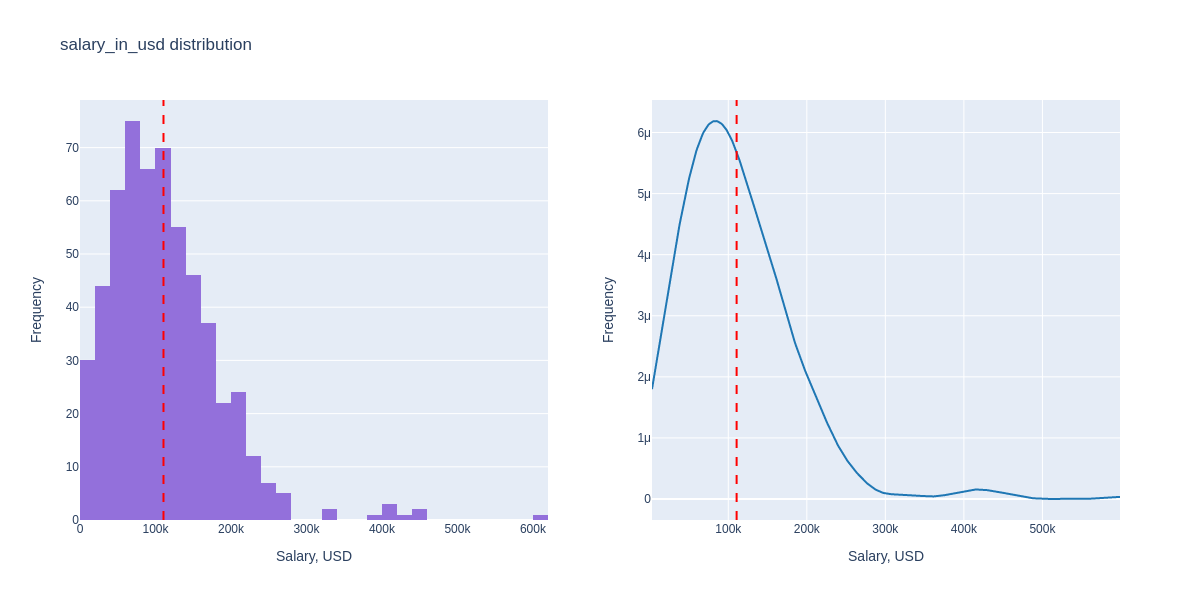

In [14]:
fig3 = make_subplots(rows=1, cols=2)
fig3.add_trace(
    go.Histogram(x=data['salary_in_usd'],
            marker_color="MediumPurple",
            name="Salary histogram"),
    row=1, col=1
)

for trace in fig2.select_traces():
        fig3.add_trace(trace, row=1, col=2)

# fig3.add_trace(
#     go.Box(x=data['salary']),
#     row=2, col=1
# )
fig3.update_layout(
    autosize=False,
    width=1200,
    height=600,
    title_text="salary_in_usd distribution"
)

fig3.add_vline(data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig3.update_xaxes(title_text="Salary, USD")
fig3.update_yaxes(title_text="Frequency")
fig3.update(layout_showlegend=False)
fig3.write_image('images/salary_hist.png')
fig3.show('png')

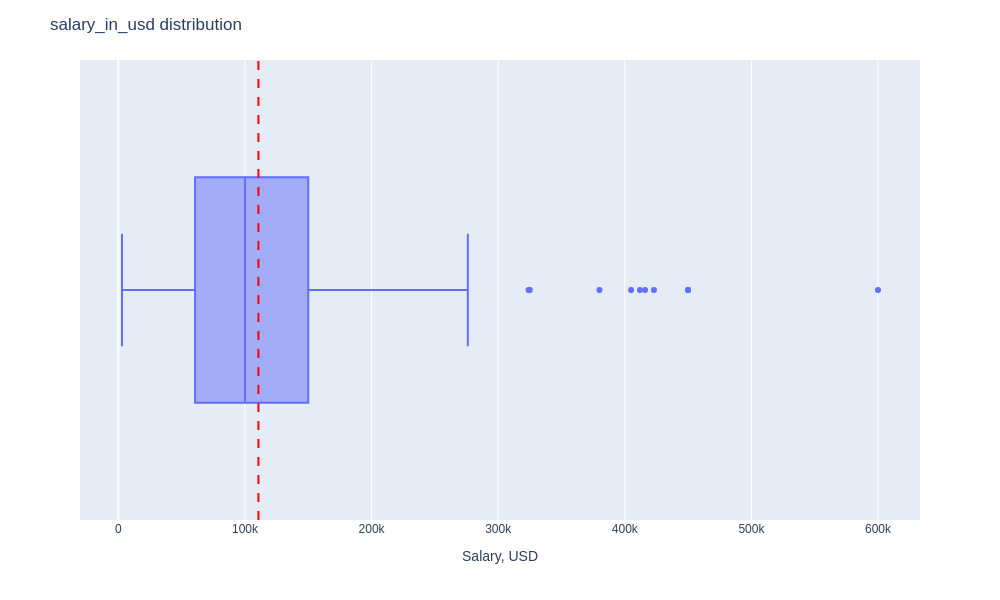

In [15]:
fig4 = px.box(
    data['salary_in_usd'],
    x='salary_in_usd'
)
fig4.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text="salary_in_usd distribution"
)

fig4.add_vline(data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig4.update_xaxes(title_text="Salary, USD")
fig4.write_image('images/salary_dist.png')
fig4.show('png')

In [16]:
data['salary_in_usd'].describe().round(2)

count       565.00
mean     110610.34
std       72280.70
min        2859.00
25%       60757.00
50%      100000.00
75%      150000.00
max      600000.00
Name: salary_in_usd, dtype: float64

This is our "target" feature and as we can see its distribution is far from gaussian.

#### *remote_ratio* feature:

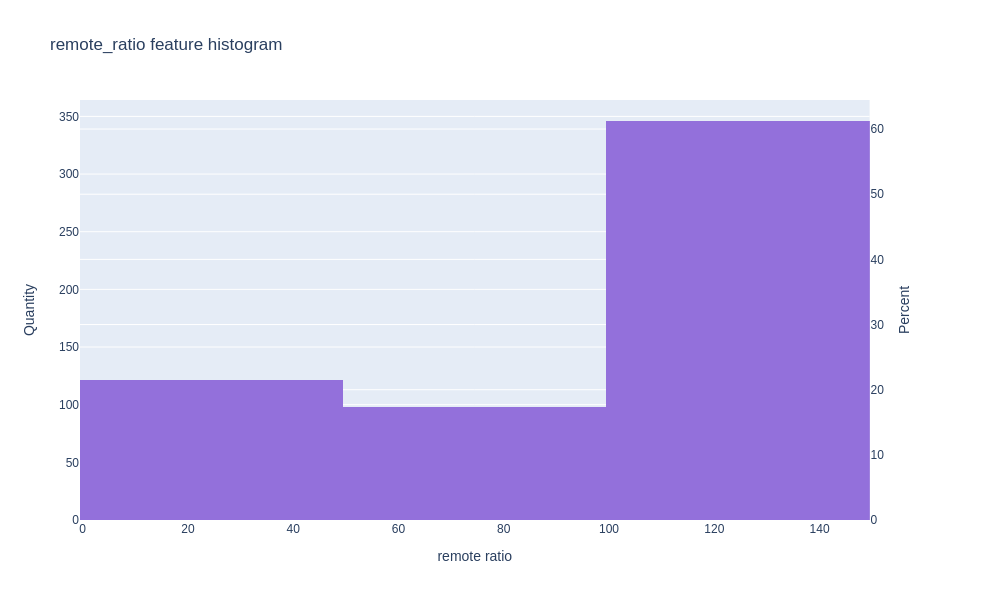

In [17]:
fig_remote_ratio = make_subplots(specs=[[{"secondary_y": True}]])
fig_remote_ratio.add_trace(
    go.Histogram(x=data['remote_ratio'],
           nbinsx=3,
           marker_color="MediumPurple",
           name="Quantity"),
    secondary_y=False,
)

fig_remote_ratio.add_trace(
    go.Histogram(x=data['remote_ratio'],
           nbinsx=3,
           histnorm='percent',
           marker_color="MediumPurple",
           name="Percent"),
    secondary_y=True,
)

fig_remote_ratio.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text="remote_ratio feature histogram"
)

fig_remote_ratio.update_xaxes(title_text="remote ratio")

fig_remote_ratio.update_yaxes(title_text="Quantity", secondary_y=False)
fig_remote_ratio.update_yaxes(title_text="Percent", secondary_y=True)
fig_remote_ratio.update(layout_showlegend=False)
fig_remote_ratio.write_image('images/remote_ratio.png')
fig_remote_ratio.show('png')

In [18]:
data['remote_ratio'].describe().round(2)

count    565.00
mean      69.91
std       40.90
min        0.00
25%       50.00
50%      100.00
75%      100.00
max      100.00
Name: remote_ratio, dtype: float64

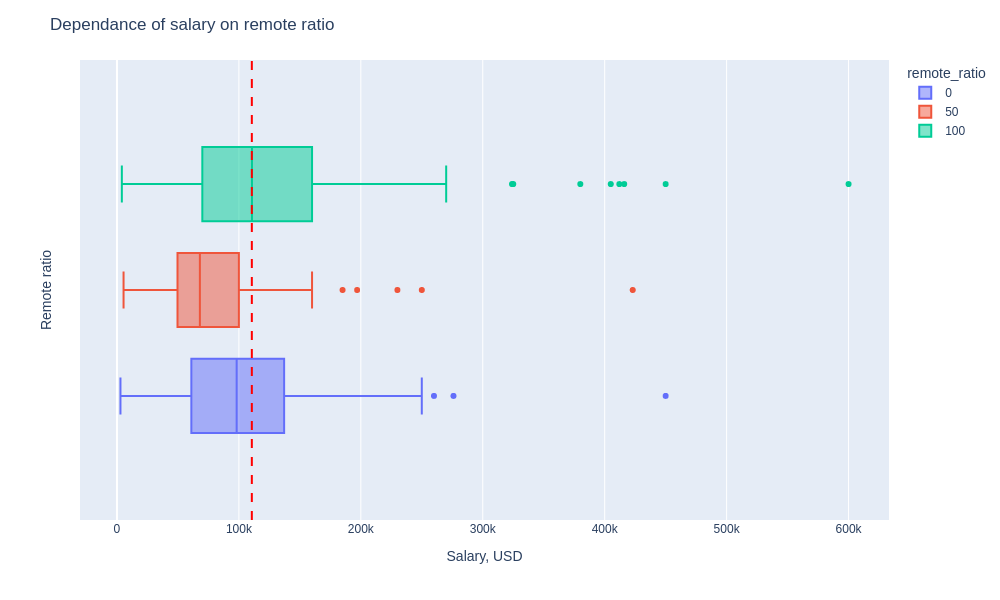

In [19]:
fig_remote_salary = px.box(
    data,
    x='salary_in_usd',
    color='remote_ratio',
    points='outliers'
)

fig_remote_salary.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text="Dependance of salary on remote ratio"
)

fig_remote_salary.add_vline(data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig_remote_salary.update_xaxes(title_text="Salary, USD")

fig_remote_salary.update_yaxes(title_text="Remote ratio")
fig_remote_salary.update(layout_showlegend=True)
fig_remote_salary.write_image('images/remote_salary.png')
fig_remote_salary.show('png')

Visually remote ratio does affect salary value.

#### *salary* feature:

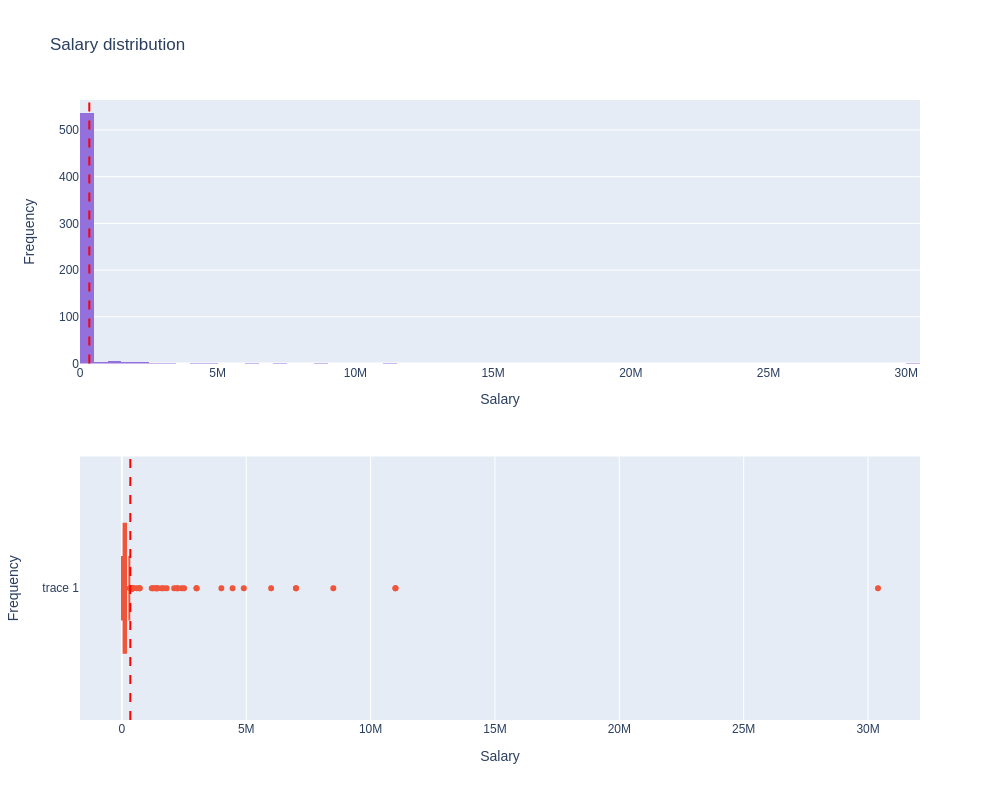

In [20]:
fig_salary = make_subplots(rows=2, cols=1)
fig_salary.add_trace(
    go.Histogram(x=data['salary'],
            marker_color="MediumPurple",
            name="Salary histogram"),
    row=1, col=1
)

fig_salary.add_trace(
    go.Box(x=data['salary']),
    row=2, col=1
)

fig_salary.update_layout(
    autosize=False,
    width=1000,
    height=800,
    title_text="Salary distribution"
)

fig_salary.add_vline(data['salary'].mean(), line_width=2, line_dash="dash", line_color="red")
fig_salary.update_xaxes(title_text="Salary")
fig_salary.update_yaxes(title_text="Frequency")
fig_salary.update(layout_showlegend=False)
fig_salary.write_image('images/salary.png')
fig_salary.show('png')

In [21]:
data['salary'].describe().round(2)

count         565.00
mean       338115.99
std       1599878.79
min          4000.00
25%         67000.00
50%        110925.00
75%        165000.00
max      30400000.00
Name: salary, dtype: float64

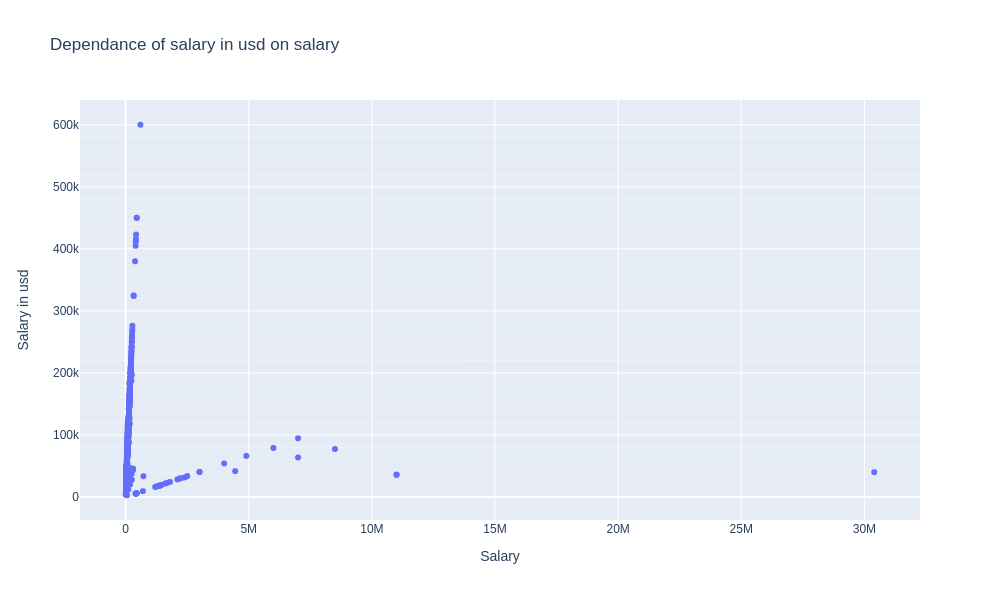

In [22]:
fig_salary_salary = px.scatter(
    data,
    y='salary_in_usd',
    x='salary',
    height=600,
    width=1000,
    title='Dependance of salary in usd on salary'
)
fig_salary_salary.update_yaxes(minor_showgrid=True)
fig_salary_salary.layout.xaxis.title.text = 'Salary'
fig_salary_salary.layout.yaxis.title.text = 'Salary in usd'
fig_salary_salary.write_image('images/salary_salary.png')
fig_salary_salary.show('png')

There are several rays coming from zero point corresponding to different currency types. However, there is no direct answer to whether salary affects salary in usd. Some other features may have their impact.

### Visual analysis of categorical features

In [23]:
# minimum number of observations when Shapiro-Wilk test can be performed
shapiro_limit = 3

#### *experience_level* feature

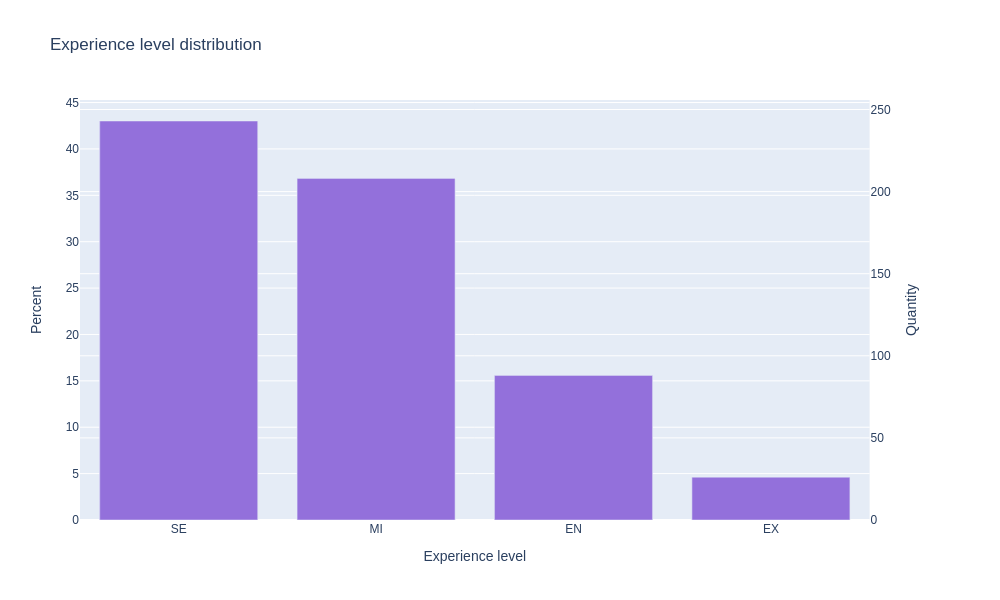

In [24]:
exp_vc = data['experience_level'].value_counts()

fig_exp = make_subplots(specs=[[{"secondary_y": True}]])
fig_exp.add_trace(
    go.Bar(y=round(exp_vc / data['experience_level'].shape[0] * 100, 2),
           x=exp_vc.index,
           marker_color="MediumPurple",
           name="Percent"),
    secondary_y=False,
)

fig_exp.add_trace(
    go.Bar(x=exp_vc.index,
           y=exp_vc, 
           marker_color="MediumPurple",
           name="Quantity"),
    secondary_y=True,
)

fig_exp.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text="Experience level distribution"
)

fig_exp.update_xaxes(title_text="Experience level")

fig_exp.update_yaxes(title_text="Percent", secondary_y=False)
fig_exp.update_yaxes(title_text="Quantity", secondary_y=True)
fig_exp.update(layout_showlegend=False)
fig_exp.write_image('images/exp.png')
fig_exp.show('png')

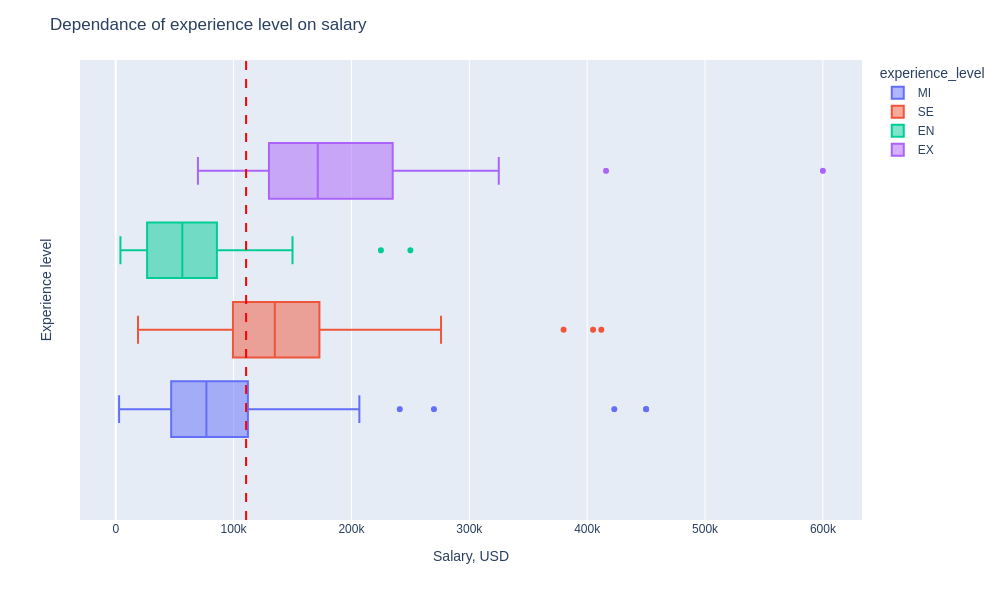

In [25]:
fig_box_exp = px.box(
    data,
    x='salary_in_usd',
    color='experience_level',
    points='outliers'
)

fig_box_exp.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text="Dependance of experience level on salary"
)

fig_box_exp.add_vline(data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig_box_exp.update_xaxes(title_text="Salary, USD")

fig_box_exp.update_yaxes(title_text="Experience level")
fig_box_exp.update(layout_showlegend=True)
fig_box_exp.write_image('images/box_exp.png')
fig_box_exp.show('png')

In [26]:
data.groupby('experience_level')['salary_in_usd'].describe().round(2).sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EX,26.0,199392.04,117071.26,69741.0,130006.50,171437.5,233750.00,600000.0
SE,243.0,138374.88,59955.97,18907.0,99531.50,135000.0,171881.00,412000.0
MI,208.0,87793.00,64118.97,2859.0,47163.75,76940.0,112075.00,450000.0
EN,88.0,61643.32,44395.54,4000.0,27505.00,56500.0,85425.75,250000.0


Visually salary depends on experience level.

#### *employment_type* feature:

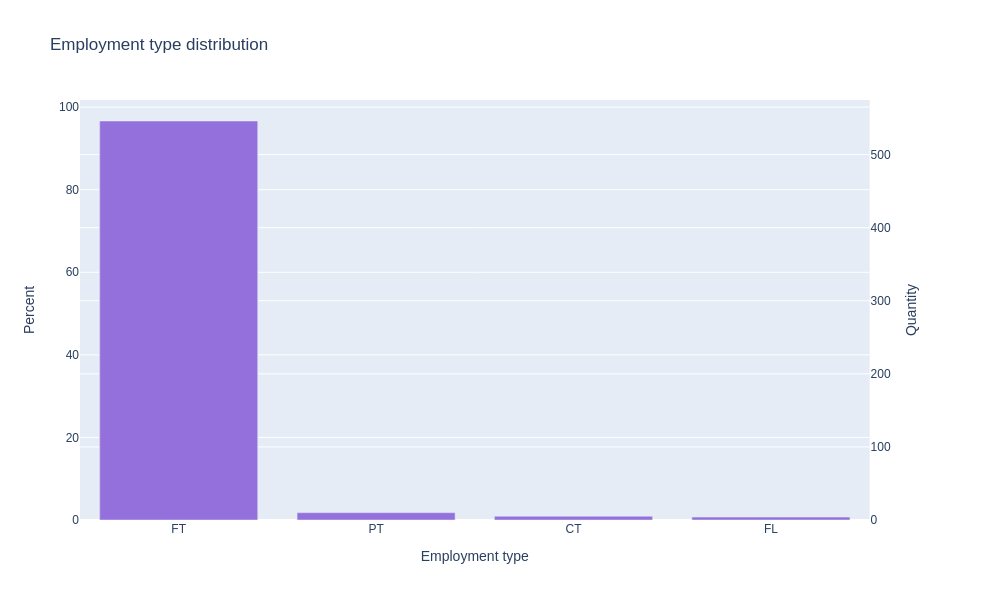

In [27]:
emp_type_vc = data['employment_type'].value_counts()

fig_emp_type = make_subplots(specs=[[{"secondary_y": True}]])
fig_emp_type.add_trace(
    go.Bar(y=round(emp_type_vc / data['employment_type'].shape[0] * 100, 2),
           x=emp_type_vc.index,
           marker_color="MediumPurple",
           name="Percent"),
    secondary_y=False,
)

fig_emp_type.add_trace(
    go.Bar(x=emp_type_vc.index,
           y=emp_type_vc, 
           marker_color="MediumPurple",
           name="Quantity"),
    secondary_y=True,
)

fig_emp_type.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text="Employment type distribution"
)

fig_emp_type.update_xaxes(title_text="Employment type")

fig_emp_type.update_yaxes(title_text="Percent", secondary_y=False)
fig_emp_type.update_yaxes(title_text="Quantity", secondary_y=True)
fig_emp_type.update(layout_showlegend=False)
fig_emp_type.write_image('images/emp_type.png')
fig_emp_type.show('png')

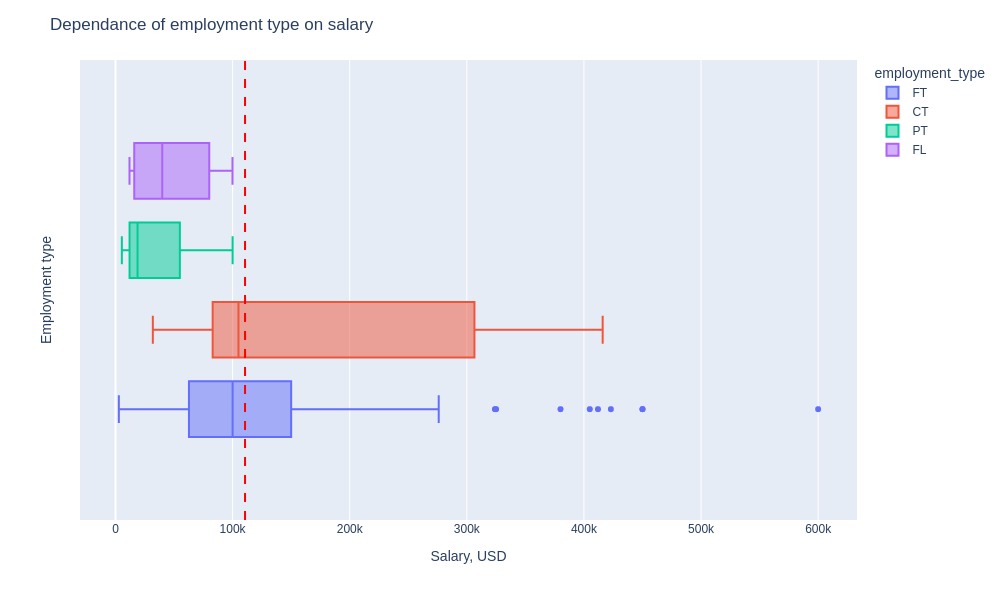

In [28]:
fig_box_emp = px.box(
    data,
    x='salary_in_usd',
    color='employment_type',
    points='outliers'
)

fig_box_emp.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text="Dependance of employment type on salary"
)

fig_box_emp.add_vline(data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig_box_emp.update_xaxes(title_text="Salary, USD")

fig_box_emp.update_yaxes(title_text="Employment type")
fig_box_emp.update(layout_showlegend=True)
fig_box_emp.write_image('images/box_emp.png')
fig_box_emp.show('png')

In [29]:
data.groupby('employment_type')['salary_in_usd'].describe().round(2).sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,5.0,184575.00,156250.89,31875.0,100000.0,105000.0,270000.0,416000.0
FT,546.0,111811.84,70790.70,2859.0,62726.0,100000.0,150000.0,600000.0
FL,4.0,48000.00,40529.82,12000.0,18000.0,40000.0,70000.0,100000.0
PT,10.0,33070.50,31472.91,5409.0,12000.0,18817.5,48370.0,100000.0


Visually salary depends on employment type

#### *job_title* feature:

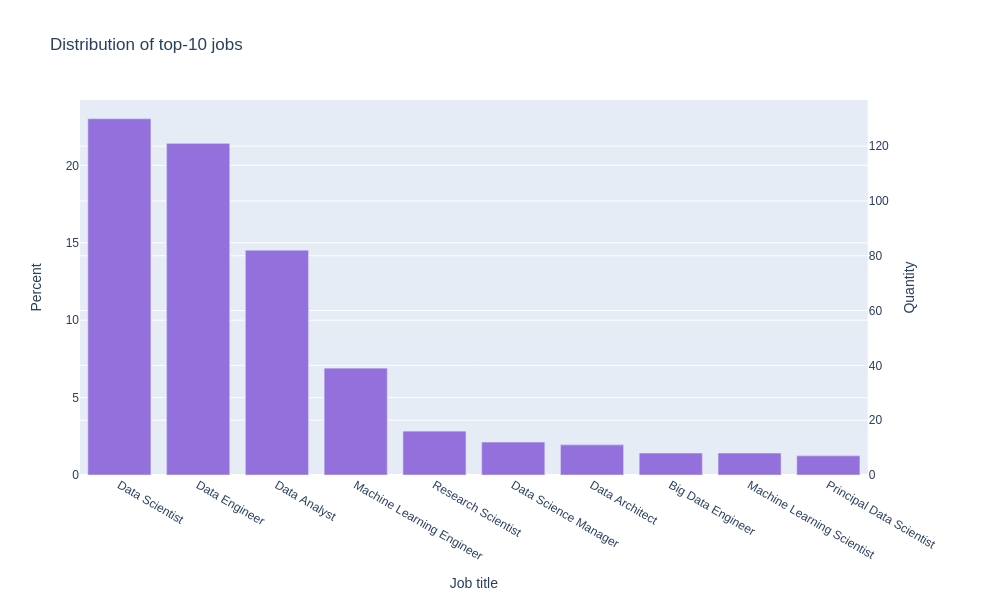

In [30]:
shapiro_limit = 3
top_jobs = 10
jobs_vc = data['job_title'].value_counts()
jobs_vc_top = jobs_vc[jobs_vc >= shapiro_limit]

if len(jobs_vc[jobs_vc >= shapiro_limit]) >= top_jobs:
    jobs_vc = jobs_vc[:top_jobs]
else:
    jobs_vc = jobs_vc_top
    top_jobs = len(jobs_vc[jobs_vc >= shapiro_limit])

fig_jobs = make_subplots(specs=[[{"secondary_y": True}]])
fig_jobs.add_trace(
    go.Bar(y=round(jobs_vc / data['job_title'].shape[0] * 100, 2),
           x=jobs_vc.index,
           marker_color="MediumPurple",
           name="Percent"),
    secondary_y=False,
)

fig_jobs.add_trace(
    go.Bar(x=jobs_vc.index,
           y=jobs_vc, 
           marker_color="MediumPurple",
           name="Quantity"),
    secondary_y=True,
)

fig_jobs.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text=f"Distribution of top-{top_jobs} jobs"
)

fig_jobs.update_xaxes(title_text="Job title")

fig_jobs.update_yaxes(title_text="Percent", secondary_y=False)
fig_jobs.update_yaxes(title_text="Quantity", secondary_y=True)
fig_jobs.update(layout_showlegend=False)
fig_jobs.write_image('images/jobs.png')
fig_jobs.show('png')

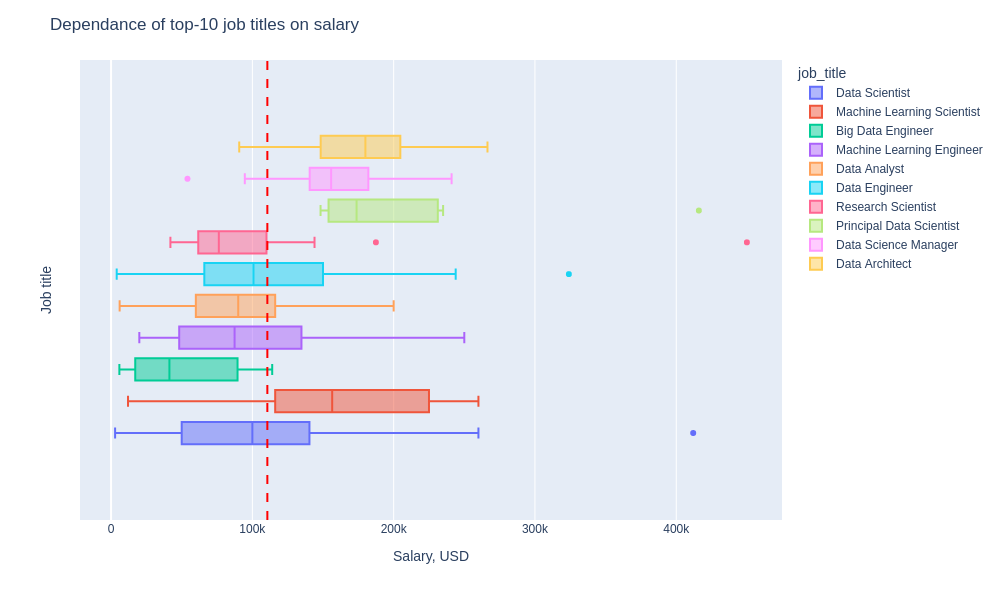

In [31]:
fig_box_title = px.box(
    data[data['job_title'].isin(jobs_vc.index)],
    x='salary_in_usd',
    color='job_title',
    points='outliers'
)

fig_box_title.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text=f"Dependance of top-{top_jobs} job titles on salary"
)

fig_box_title.add_vline(data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig_box_title.update_xaxes(title_text="Salary, USD")

fig_box_title.update_yaxes(title_text="Job title")
fig_box_title.update(layout_showlegend=True)
fig_box_title.write_image('images/box_title.png')
fig_box_title.show('png')

In [32]:
data.groupby('job_title')['salary_in_usd'].describe().round(2).sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Analytics Lead,1.0,405000.00,NaN,405000.0,405000.00,405000.0,405000.00,405000.0
Financial Data Analyst,2.0,275000.00,247487.37,100000.0,187500.00,275000.0,362500.00,450000.0
Head of Data,5.0,160162.60,88780.42,32974.0,102839.00,200000.0,230000.00,235000.0
Principal Data Engineer,3.0,328333.33,235389.75,185000.0,192500.00,200000.0,400000.00,600000.0
Data Architect,11.0,177873.91,45714.72,90700.0,148900.00,180000.0,200669.50,266400.0
Analytics Engineer,4.0,175000.00,29508.08,135000.0,165000.00,179850.0,189850.00,205300.0
Principal Data Scientist,7.0,215242.43,94705.04,148261.0,156837.00,173762.0,227500.00,416000.0
Director of Data Science,7.0,195074.00,70015.79,130026.0,147756.50,168000.0,223489.50,325000.0
Data Specialist,1.0,165000.00,NaN,165000.0,165000.00,165000.0,165000.00,165000.0


Visually job title does affect salary.

#### *salary_currency* feature:

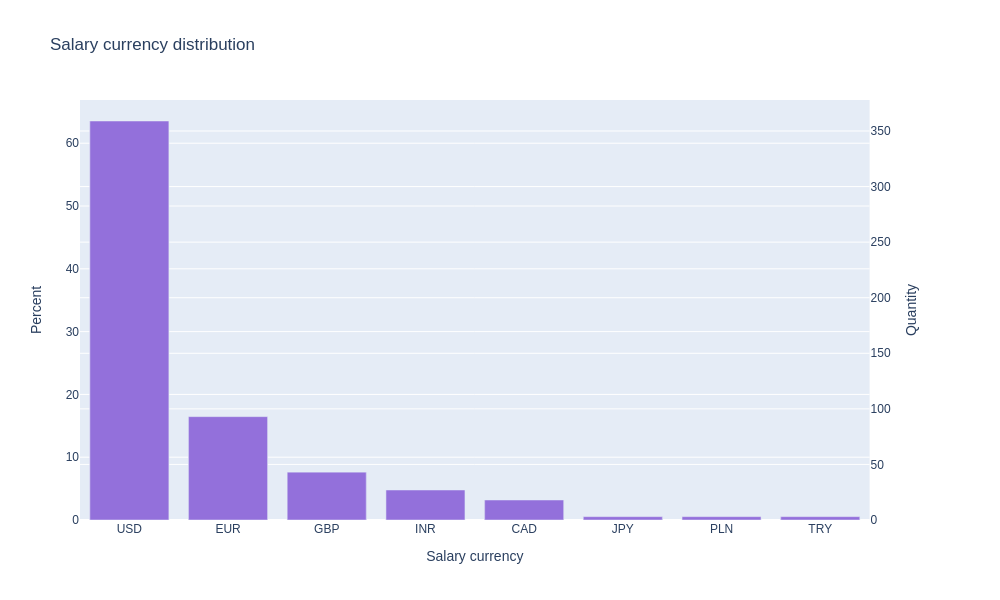

In [33]:
curr_vc = data['salary_currency'].value_counts()
curr_vc_top = curr_vc[curr_vc >= shapiro_limit]

fig_currency = make_subplots(specs=[[{"secondary_y": True}]])
fig_currency.add_trace(
    go.Bar(y=round(curr_vc_top / data['salary_currency'].shape[0] * 100, 2),
           x=curr_vc_top.index,
           marker_color="MediumPurple",
           name="Percent"),
    secondary_y=False,
)

fig_currency.add_trace(
    go.Bar(x=curr_vc_top.index,
           y=curr_vc_top, 
           marker_color="MediumPurple",
           name="Quantity"),
    secondary_y=True,
)

fig_currency.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text="Salary currency distribution"
)

fig_currency.update_xaxes(title_text="Salary currency")

fig_currency.update_yaxes(title_text="Percent", secondary_y=False)
fig_currency.update_yaxes(title_text="Quantity", secondary_y=True)
fig_currency.update(layout_showlegend=False)
fig_currency.write_image('images/currency.png')
fig_currency.show('png')

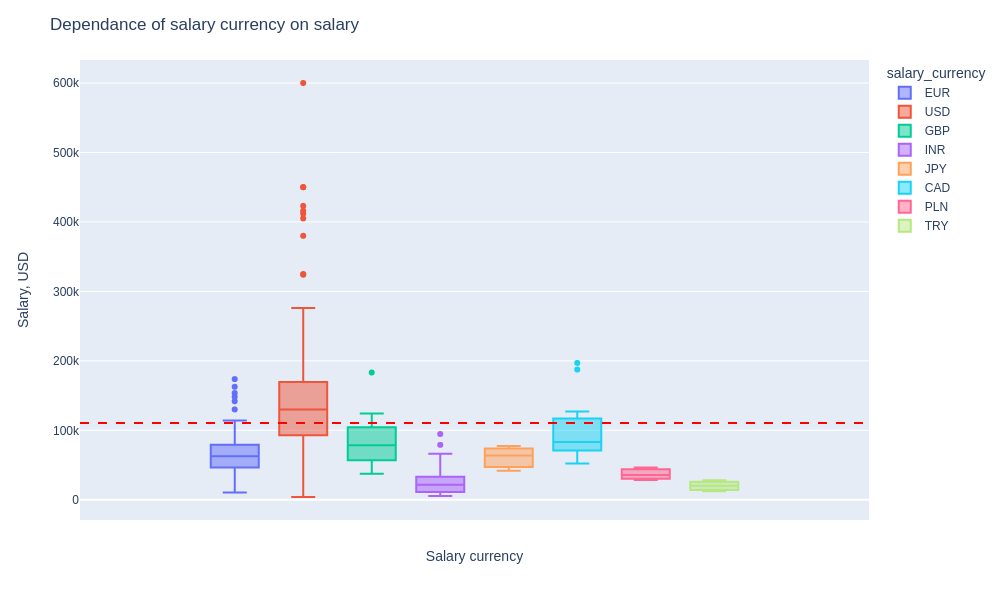

In [34]:
fig_box_curr = px.box(
    data[data['salary_currency'].isin(curr_vc_top.index)],
    y='salary_in_usd',
    color='salary_currency',
    points='outliers'
)

fig_box_curr.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text=f"Dependance of salary currency on salary"
)

fig_box_curr.add_hline(data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig_box_curr.update_xaxes(title_text="Salary currency")

fig_box_curr.update_yaxes(title_text="Salary, USD")
fig_box_curr.update(layout_showlegend=True)
fig_box_curr.write_image('images/box_curr.png')
fig_box_curr.show('png')

In [35]:
data.groupby('salary_currency')['salary_in_usd'].describe().round(2).sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
salary_currency,,,,,,,,
USD,359.0,137007.35,74563.43,4000.0,93075.00,130000.0,169000.00,600000.0
CHF,1.0,122346.00,NaN,122346.0,122346.00,122346.0,122346.00,122346.0
SGD,2.0,104176.50,21047.03,89294.0,96735.25,104176.5,111617.75,119059.0
AUD,2.0,87064.00,510.53,86703.0,86883.50,87064.0,87244.50,87425.0
CAD,18.0,97222.89,40724.80,52396.0,71130.50,83264.5,113750.75,196979.0
GBP,43.0,81744.12,30084.12,37300.0,57575.00,78526.0,103931.00,183228.0
JPY,3.0,60921.33,18000.36,41689.0,52700.00,63711.0,70537.50,77364.0
EUR,93.0,65598.91,31292.37,10354.0,46759.00,62649.0,79197.00,173762.0
CNY,2.0,40283.50,4309.82,37236.0,38759.75,40283.5,41807.25,43331.0


Visual analysis shows that salary currency affects salary value.

#### *employee_residence* feature:

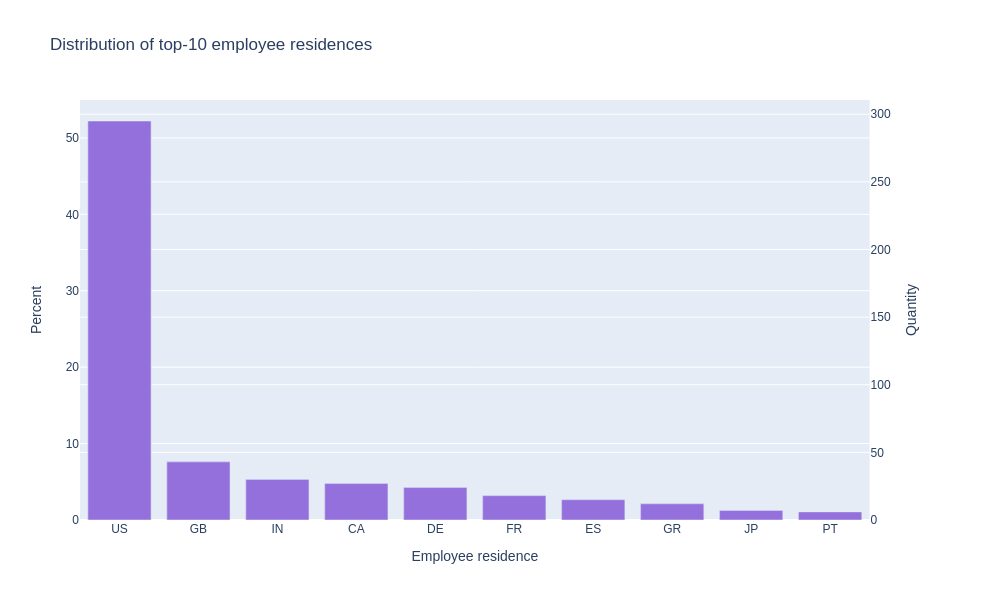

In [36]:
top_residence = 10
residence_vc = data['employee_residence'].value_counts()
residence_vc_top = residence_vc[residence_vc >= shapiro_limit]

if len(residence_vc[residence_vc >= shapiro_limit]) >= top_residence:
    residence_vc = residence_vc[:top_residence]
else:
    residence_vc = residence_vc_top
    top_residence = len(residence_vc[residence_vc >= shapiro_limit])
    
fig_residence = make_subplots(specs=[[{"secondary_y": True}]])
fig_residence.add_trace(
    go.Bar(y=round(residence_vc / data['employee_residence'].shape[0] * 100, 2),
           x=residence_vc.index,
           marker_color="MediumPurple",
           name="Percent"),
    secondary_y=False,
)

fig_residence.add_trace(
    go.Bar(x=residence_vc.index,
           y=residence_vc, 
           marker_color="MediumPurple",
           name="Quantity"),
    secondary_y=True,
)

fig_residence.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text=f"Distribution of top-{top_residence} employee residences"
)

fig_residence.update_xaxes(title_text="Employee residence")

fig_residence.update_yaxes(title_text="Percent", secondary_y=False)
fig_residence.update_yaxes(title_text="Quantity", secondary_y=True)
fig_residence.update(layout_showlegend=False)
fig_residence.write_image('images/residence.png')
fig_residence.show('png')

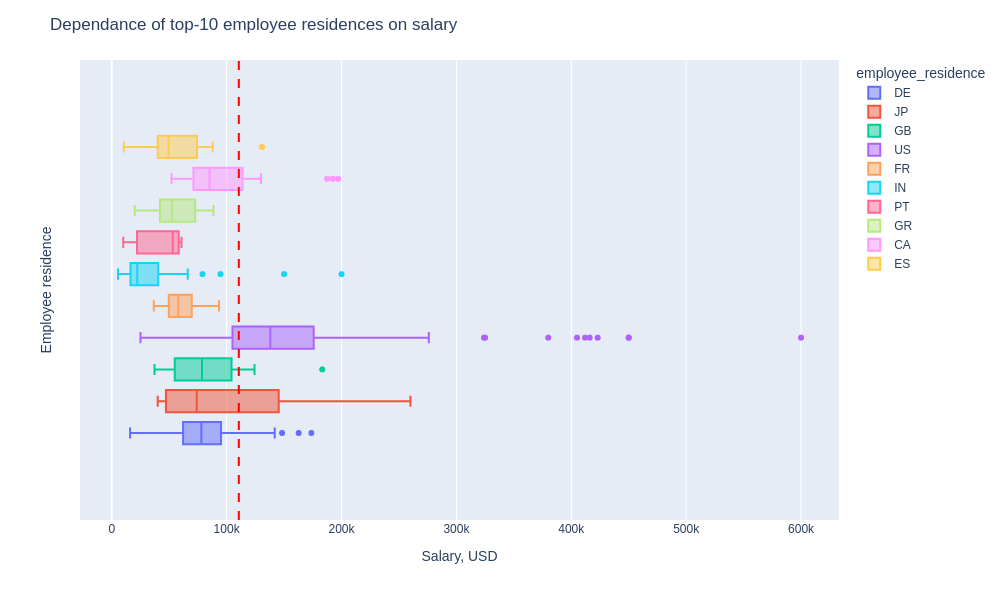

In [37]:
fig_box_residence = px.box(
    data[data['employee_residence'].isin(residence_vc.index)],
    x='salary_in_usd',
    color='employee_residence',
    points='outliers'
)

fig_box_residence.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text=f"Dependance of top-{top_residence} employee residences on salary"
)

fig_box_residence.add_vline(data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig_box_residence.update_xaxes(title_text="Salary, USD")

fig_box_residence.update_yaxes(title_text="Employee residence")
fig_box_residence.update(layout_showlegend=True)
fig_box_residence.write_image('images/box_residence.png')
fig_box_residence.show('png')

In [38]:
data.groupby('employee_residence')['salary_in_usd'].describe().round(2).sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
MY,1.0,200000.00,NaN,200000.0,200000.00,200000.0,200000.00,200000.0
PR,1.0,160000.00,NaN,160000.0,160000.00,160000.0,160000.00,160000.0
US,295.0,150094.92,70918.56,25000.0,105200.00,138000.0,175550.00,600000.0
NZ,1.0,125000.00,NaN,125000.0,125000.00,125000.0,125000.00,125000.0
CH,1.0,122346.00,NaN,122346.0,122346.00,122346.0,122346.00,122346.0
AE,3.0,100000.00,30413.81,65000.0,90000.00,115000.0,117500.00,120000.0
SG,2.0,104176.50,21047.03,89294.0,96735.25,104176.5,111617.75,119059.0
JE,1.0,100000.00,NaN,100000.0,100000.00,100000.0,100000.00,100000.0
DZ,1.0,100000.00,NaN,100000.0,100000.00,100000.0,100000.00,100000.0


Visual analysis shows that employee residence affects salary value.

#### *company_location* feature:

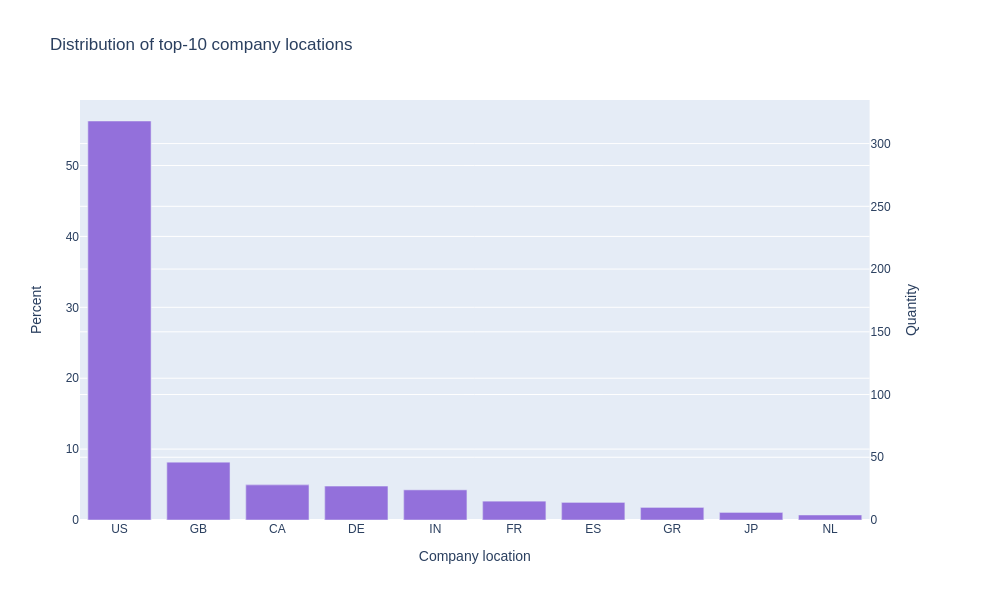

In [39]:
top_location = 10
location_vc = data['company_location'].value_counts()
location_vc_top = location_vc[location_vc >= shapiro_limit]

if len(location_vc[location_vc >= shapiro_limit]) >= top_location:
    location_vc = location_vc[:top_location]
else:
    location_vc = location_vc_top
    top_location = len(location_vc[location_vc >= shapiro_limit])

fig_location = make_subplots(specs=[[{"secondary_y": True}]])
fig_location.add_trace(
    go.Bar(y=round(location_vc / data['company_location'].shape[0] * 100, 2),
           x=location_vc.index,
           marker_color="MediumPurple",
           name="Percent"),
    secondary_y=False,
)

fig_location.add_trace(
    go.Bar(x=location_vc.index,
           y=location_vc, 
           marker_color="MediumPurple",
           name="Quantity"),
    secondary_y=True,
)

fig_location.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text=f"Distribution of top-{top_location} company locations"
)

fig_location.update_xaxes(title_text="Company location")

fig_location.update_yaxes(title_text="Percent", secondary_y=False)
fig_location.update_yaxes(title_text="Quantity", secondary_y=True)
fig_location.update(layout_showlegend=False)
fig_location.write_image('images/location.png')
fig_location.show('png')

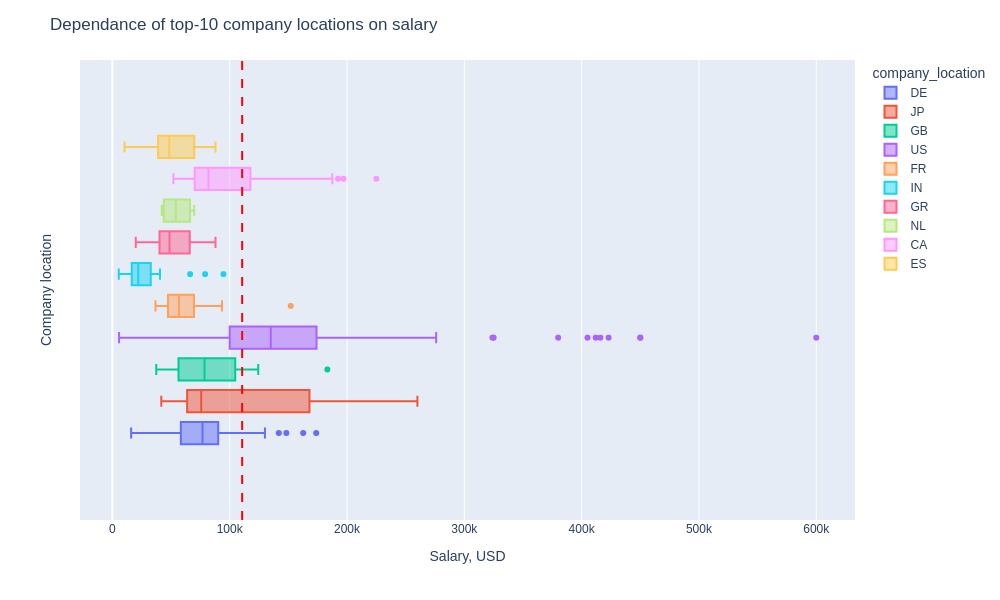

In [40]:
fig_box_loc = px.box(
    data[data['company_location'].isin(location_vc.index)],
    x='salary_in_usd',
    color='company_location',
    points='outliers'
)

fig_box_loc.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text=f"Dependance of top-{top_location} company locations on salary"
)

fig_box_loc.add_vline(data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig_box_loc.update_xaxes(title_text="Salary, USD")

fig_box_loc.update_yaxes(title_text="Company location")
fig_box_loc.update(layout_showlegend=True)
fig_box_loc.write_image('images/box_loc.png')
fig_box_loc.show('png')

In [41]:
data.groupby('company_location')['salary_in_usd'].describe().round(2).sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
RU,2.0,157500.00,102530.48,85000.0,121250.00,157500.0,193750.00,230000.0
US,318.0,144292.99,72524.34,5679.0,100000.00,135000.0,173000.00,600000.0
NZ,1.0,125000.00,NaN,125000.0,125000.00,125000.0,125000.00,125000.0
IL,1.0,119059.00,NaN,119059.0,119059.00,119059.0,119059.00,119059.0
AE,3.0,100000.00,30413.81,65000.0,90000.00,115000.0,117500.00,120000.0
DZ,1.0,100000.00,NaN,100000.0,100000.00,100000.0,100000.00,100000.0
IQ,1.0,100000.00,NaN,100000.0,100000.00,100000.0,100000.00,100000.0
SG,1.0,89294.00,NaN,89294.0,89294.00,89294.0,89294.00,89294.0
AU,3.0,108042.67,36337.91,86703.0,87064.00,87425.0,118712.50,150000.0


Visual analysis shows that company location affects salary value.

#### *company_size* feature:

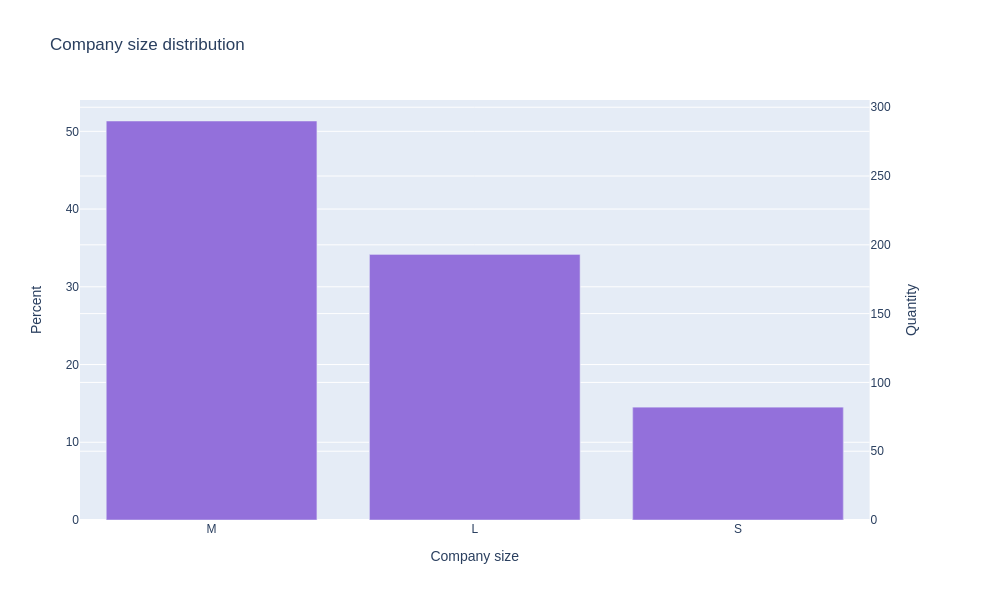

In [42]:
size_vc = data['company_size'].value_counts()

fig_size = make_subplots(specs=[[{"secondary_y": True}]])
fig_size.add_trace(
    go.Bar(y=round(size_vc / data['company_size'].shape[0] * 100, 2),
           x=size_vc.index,
           marker_color="MediumPurple",
           name="Percent"),
    secondary_y=False,
)

fig_size.add_trace(
    go.Bar(x=size_vc.index,
           y=size_vc, 
           marker_color="MediumPurple",
           name="Quantity"),
    secondary_y=True,
)

fig_size.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text="Company size distribution"
)

fig_size.update_xaxes(title_text="Company size")

fig_size.update_yaxes(title_text="Percent", secondary_y=False)
fig_size.update_yaxes(title_text="Quantity", secondary_y=True)
fig_size.update(layout_showlegend=False)
fig_size.write_image('images/size.png')
fig_size.show('png')

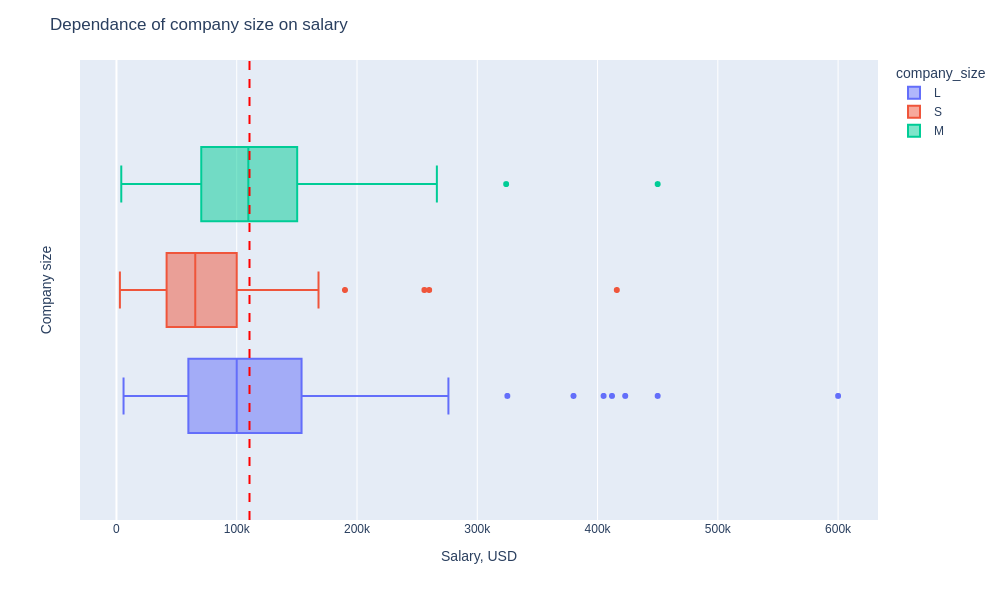

In [43]:
fig_box_size = px.box(
    data,
    x='salary_in_usd',
    color='company_size',
    points='outliers'
)

fig_box_size.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text=f"Dependance of company size on salary"
)

fig_box_size.add_vline(data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig_box_size.update_xaxes(title_text="Salary, USD")

fig_box_size.update_yaxes(title_text="Company size")
fig_box_size.update(layout_showlegend=True)
fig_box_size.write_image('images/box_size.png')
fig_box_size.show('png')

In [44]:
data.groupby('company_size')['salary_in_usd'].describe().round(2).sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
M,290.0,114807.08,60779.04,4000.0,70821.5,109640.0,150213.75,450000.0
L,193.0,118213.88,86753.27,5882.0,60000.0,100000.0,153667.00,600000.0
S,82.0,77872.10,63814.52,2859.0,41816.0,65511.0,100000.00,416000.0


Visually company size affects salary value.

***

## Statistical data analysis

In [45]:
import scipy.stats as stats

In [46]:
# significance level
alpha = 0.05

# normality check function
def decision_normality(p):
    print(f'p-value - {p:.3f}')
    if p <= alpha:
        print(f'p-value is less than significance level {alpha:.2f}. Distribution is not normal.')
        return False
    else:
        print(f'p-value is greater than significance level {alpha:.2f}. Distribution is normal.')
        return True
        
# function for declining null hypothesis
def decision_hypothesis(p):
    print(f'p-value - {p:.3f}')
    if p <= alpha:
        print(f'p-value is less than significance level {alpha:.2f}. Decline null hypothesis.')
        return True
    else:
        print(f'p-value is greater than significance level {alpha:.2f}. No reason to decline null hypothesis.')
        return False
    
# variance equality check function
def variance_equality(p):
    print(f'p-value - {p:.3f}')
    if p <= alpha:
        print(f"p-value is less than significance level {alpha:.2f}. Variances aren't equal.")
        return False
    else:
        print(f"p-value is greater than significance level {alpha:.2f}. Variances are equal.")
        return True

### *work_year* analysis

In [47]:
work_year_list = []

for year in data['work_year'].value_counts().index:
    print(f'For {year} work year: ')
    decision_normality(stats.shapiro(data[data['work_year'] == year]['salary_in_usd'])[1])
    work_year_list.append(list(data[data['work_year'] == year]['salary_in_usd']))
    print()

For 2022 work year: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For 2021 work year: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For 2020 work year: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.



All distributions aren't normal. Perform Kruskal-Wallace test. Null hypothesis is for salaries are equal.

In [48]:
decision_hypothesis(stats.kruskal(*work_year_list)[1])

p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.


True

Salaries in different work years differ from each other.

### *experience_level* analysis

In [49]:
exp_list = []

for exp_level in exp_vc.index:
    print(f'For {exp_level} experience level: ')
    decision_normality(stats.shapiro(data[data['experience_level'] == exp_level]['salary_in_usd'])[1])
    exp_list.append(list(data[data['experience_level'] == exp_level]['salary_in_usd']))
    print()

For SE experience level: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For MI experience level: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For EN experience level: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For EX experience level: 
p-value - 0.001
p-value is less than significance level 0.05. Distribution is not normal.



All distributions aren't normal. Perform Kruskal-Wallace test. Null hypothesis is for salaries are equal.

In [50]:
decision_hypothesis(stats.kruskal(*exp_list)[1])

p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.


True

Salaries aren't equal. Experience level does affect salary value.

### *employment_type* analysis

In [51]:
emp_list = []

for emp_type in emp_type_vc.index:
    print(f'For {emp_type} employment type: ')
    decision_normality(stats.shapiro(data[data['employment_type'] == emp_type]['salary_in_usd'])[1])
    emp_list.append(list(data[data['employment_type'] == emp_type]['salary_in_usd']))
    print()

For FT employment type: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For PT employment type: 
p-value - 0.023
p-value is less than significance level 0.05. Distribution is not normal.

For CT employment type: 
p-value - 0.406
p-value is greater than significance level 0.05. Distribution is normal.

For FL employment type: 
p-value - 0.507
p-value is greater than significance level 0.05. Distribution is normal.



At least one of the distributions isn't normal. Perform Kruskal-Wallace test. Null hypothesis is for salaries are equal.

In [52]:
decision_hypothesis(stats.kruskal(*emp_list)[1])

p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.


True

Employment type affects salary value.

### *job_title* analysis

In [53]:
job_list = []

for job in jobs_vc_top.index:
    print(f'For {job} job title: ')
    decision_normality(stats.shapiro(data[data['job_title'] == job]['salary_in_usd'])[1])
    job_list.append(list(data[data['job_title'] == job]['salary_in_usd']))
    print()

For Data Scientist job title: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For Data Engineer job title: 
p-value - 0.004
p-value is less than significance level 0.05. Distribution is not normal.

For Data Analyst job title: 
p-value - 0.829
p-value is greater than significance level 0.05. Distribution is normal.

For Machine Learning Engineer job title: 
p-value - 0.015
p-value is less than significance level 0.05. Distribution is not normal.

For Research Scientist job title: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For Data Science Manager job title: 
p-value - 0.473
p-value is greater than significance level 0.05. Distribution is normal.

For Data Architect job title: 
p-value - 0.899
p-value is greater than significance level 0.05. Distribution is normal.

For Big Data Engineer job title: 
p-value - 0.151
p-value is greater than significance level 0.05. Distribution is normal.

For Mac

At least one of the distributions isn't normal. Perform Kruskal-Wallace test. Null hypothesis is for salaries are equal.

In [54]:
decision_hypothesis(stats.kruskal(*job_list)[1])

p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.


True

Job title affects salary value.

### *salary_currency* analysis

In [55]:
curr_list = []

for currency in curr_vc_top.index:
    print(f'For {currency} currency type: ')
    decision_normality(stats.shapiro(data[data['salary_currency'] == currency]['salary_in_usd'])[1])
    curr_list.append(list(data[data['salary_currency'] == currency]['salary_in_usd']))
    print()

For USD currency type: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For EUR currency type: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For GBP currency type: 
p-value - 0.020
p-value is less than significance level 0.05. Distribution is not normal.

For INR currency type: 
p-value - 0.001
p-value is less than significance level 0.05. Distribution is not normal.

For CAD currency type: 
p-value - 0.007
p-value is less than significance level 0.05. Distribution is not normal.

For JPY currency type: 
p-value - 0.743
p-value is greater than significance level 0.05. Distribution is normal.

For PLN currency type: 
p-value - 0.764
p-value is greater than significance level 0.05. Distribution is normal.

For TRY currency type: 
p-value - 0.985
p-value is greater than significance level 0.05. Distribution is normal.



At least one of the distributions isn't normal. Perform Kruskal-Wallace test. Null hypothesis is for salaries are equal.

In [56]:
decision_hypothesis(stats.kruskal(*curr_list)[1])

p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.


True

Salary currency affects salary value.

### *employee_residence* analysis

In [57]:
residence_list = []

for residence in residence_vc_top.index:
    print(f'For {residence} employee residence: ')
    decision_normality(stats.shapiro(data[data['employee_residence'] == residence]['salary_in_usd'])[1])
    residence_list.append(list(data[data['employee_residence'] == residence]['salary_in_usd']))
    print()

For US employee residence: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For GB employee residence: 
p-value - 0.016
p-value is less than significance level 0.05. Distribution is not normal.

For IN employee residence: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For CA employee residence: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For DE employee residence: 
p-value - 0.075
p-value is greater than significance level 0.05. Distribution is normal.

For FR employee residence: 
p-value - 0.579
p-value is greater than significance level 0.05. Distribution is normal.

For ES employee residence: 
p-value - 0.250
p-value is greater than significance level 0.05. Distribution is normal.

For GR employee residence: 
p-value - 0.855
p-value is greater than significance level 0.05. Distribution is normal.

For JP employee residence: 
p-value - 0.035
p-value 

At least one of the distributions isn't normal. Perform Kruskal-Wallace test. Null hypothesis is for salaries are equal.

In [58]:
decision_hypothesis(stats.kruskal(*residence_list)[1])

p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.


True

Employee residence affects salary value.

### *remote_ratio* analysis

In [59]:
remote_list = []

for ratio in data['remote_ratio'].value_counts().index:
    print(f'For {ratio} remote ratio: ')
    decision_normality(stats.shapiro(data[data['remote_ratio'] == ratio]['salary_in_usd'])[1])
    remote_list.append(list(data[data['remote_ratio'] == ratio]['salary_in_usd']))
    print()

For 100 remote ratio: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For 0 remote ratio: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For 50 remote ratio: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.



At least one of the distributions isn't normal. Perform Kruskal-Wallace test. Null hypothesis is for salaries are equal.

In [60]:
decision_hypothesis(stats.kruskal(*remote_list)[1])

p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.


True

Remote ratio affects salary value.

### *company_location* analysis

In [61]:
location_list = []

for location in location_vc_top.index:
    print(f'For {location} company location: ')
    decision_normality(stats.shapiro(data[data['company_location'] == location]['salary_in_usd'])[1])
    location_list.append(list(data[data['company_location'] == location]['salary_in_usd']))
    print()

For US company location: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For GB company location: 
p-value - 0.014
p-value is less than significance level 0.05. Distribution is not normal.

For CA company location: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For DE company location: 
p-value - 0.040
p-value is less than significance level 0.05. Distribution is not normal.

For IN company location: 
p-value - 0.001
p-value is less than significance level 0.05. Distribution is not normal.

For FR company location: 
p-value - 0.002
p-value is less than significance level 0.05. Distribution is not normal.

For ES company location: 
p-value - 0.863
p-value is greater than significance level 0.05. Distribution is normal.

For GR company location: 
p-value - 0.948
p-value is greater than significance level 0.05. Distribution is normal.

For JP company location: 
p-value - 0.101
p-value is greater than 

At least one of the distributions isn't normal. Perform Kruskal-Wallace test. Null hypothesis is for salaries are equal.

In [62]:
decision_hypothesis(stats.kruskal(*location_list)[1])

p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.


True

Company location does affect salary value.

### *company_size* analysis

In [63]:
size_list = []

for size in size_vc.index:
    print(f'For {size} company size: ')
    decision_normality(stats.shapiro(data[data['company_size'] == size]['salary_in_usd'])[1])
    size_list.append(list(data[data['company_size'] == size]['salary_in_usd']))
    print()

For M company size: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For L company size: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.

For S company size: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.



None of the distributions are normal. Perform Kruskal-Wallace test. Null hypothesis is for salaries are equal.

In [64]:
decision_hypothesis(stats.kruskal(*size_list)[1])

p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.


True

Company size does affect salary value.

***

## HR agency key questions

### Do Data Scientists have annual salary growth?

Visual comparison

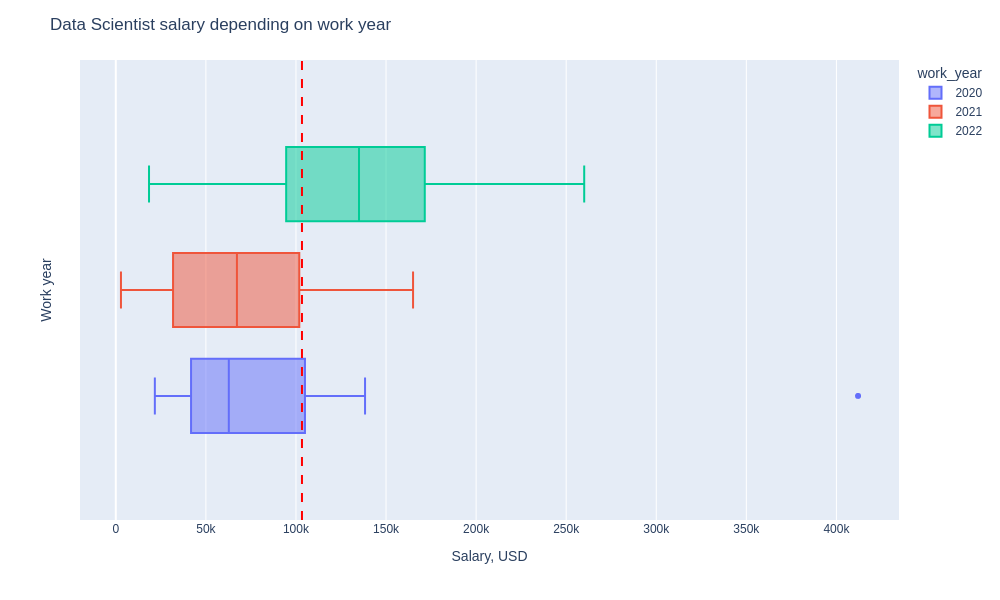

In [65]:
ds_data = data[data['job_title'] == 'Data Scientist']

fig01 = px.box(
    ds_data,
    x='salary_in_usd',
    color='work_year',
    points='outliers'
)

fig01.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text=f"Data Scientist salary depending on work year"
)

fig01.add_vline(ds_data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig01.update_xaxes(title_text="Salary, USD")

fig01.update_yaxes(title_text="Work year")
fig01.update(layout_showlegend=True)
fig01.write_image('images/ds_year.png')
fig01.show('png')

In [66]:
w_years = ds_data['work_year'].value_counts().index.sort_values()

for idx in range(len(w_years) - 1):
    wy0 = ds_data[ds_data['work_year'] == w_years[idx]]['salary_in_usd']
    wy1 = ds_data[ds_data['work_year'] == w_years[idx + 1]]['salary_in_usd']
    print(f'For {w_years[idx]} work year: ')
    dec0 = decision_normality(stats.shapiro(wy0)[1])
    print(f'For {w_years[idx + 1]} work year: ')
    dec1 = decision_normality(stats.shapiro(wy1)[1])
    
    if (dec0 and dec1):
        print('\nBoth samples have normal distribution. Perform 2-sample t-criterium test:')
        print('Variance equality test')
        
        if (variance_equality(stats.levene(wy0, wy1)[1])):
            decision_hypothesis(stats.ttest_ind(wy0, wy1, alternative='less', equal_var=True)[1])
        else:
            decision_hypothesis(stats.ttest_ind(wy0, wy1, alternative='less', equal_var=False)[1])
    
    else:
        print('\nOne of samples is not distributed normally. Perform U-test Mann-Whitney:')
        decision_hypothesis(stats.mannwhitneyu(wy0, wy1, alternative='less')[1])
        
    print()

For 2020 work year: 
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.
For 2021 work year: 
p-value - 0.107
p-value is greater than significance level 0.05. Distribution is normal.

One of samples is not distributed normally. Perform U-test Mann-Whitney:
p-value - 0.705
p-value is greater than significance level 0.05. No reason to decline null hypothesis.

For 2021 work year: 
p-value - 0.107
p-value is greater than significance level 0.05. Distribution is normal.
For 2022 work year: 
p-value - 0.676
p-value is greater than significance level 0.05. Distribution is normal.

Both samples have normal distribution. Perform 2-sample t-criterium test:
Variance equality test
p-value - 0.264
p-value is greater than significance level 0.05. Variances are equal.
p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.



We can't conclude that salary in 2021 is greater than that of 2020. However salary in 2022 is higher than that of 2021. Nevertheless, overall conclusion is annual salary growth cannot be observed.

### What are Data Scientist and Data Engineer salaries in comparison in 2022?

Visual comparison.

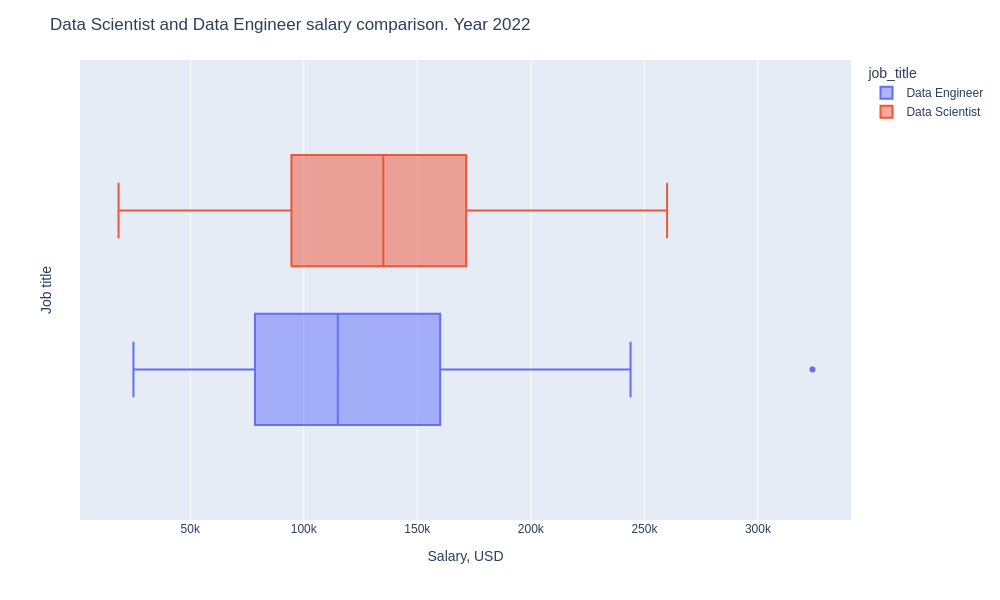

In [67]:
data2022 = data[data['work_year'] == 2022]

fig02 = px.box(
    data2022[data2022['job_title'].isin(['Data Scientist', 'Data Engineer'])],
    x='salary_in_usd',
    color='job_title',
    points='outliers'
)

fig02.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text=f"Data Scientist and Data Engineer salary comparison. Year 2022"
)

#fig02.add_vline(data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig02.update_xaxes(title_text="Salary, USD")

fig02.update_yaxes(title_text="Job title")
fig02.update(layout_showlegend=True)
fig02.write_image('images/ds_de_comparison.png')
fig02.show('png')

In [68]:
ds_salary = data2022[data2022['job_title'] == 'Data Scientist']['salary_in_usd']
de_salary = data2022[data2022['job_title'] == 'Data Engineer']['salary_in_usd']

dec0 = decision_normality(stats.shapiro(ds_salary)[1])
dec1 = decision_normality(stats.shapiro(de_salary)[1])

if (dec0 and dec1):
        print('\nBoth samples have normal distribution. Perform 2-sample t-criterium test:')
        print('Variance equality test')
        
        if (variance_equality(stats.levene(ds_salary, de_salary)[1])):
            decision_hypothesis(stats.ttest_ind(ds_salary, de_salary, alternative='greater', equal_var=True)[1])
        else:
            decision_hypothesis(stats.ttest_ind(ds_salary, de_salary, alternative='greater', equal_var=False)[1])
    
else:
    print('\nOne of samples is not distributed normally. Perform U-test Mann-Whitney:')
    decision_hypothesis(stats.mannwhitneyu(ds_salary, de_salary, alternative='greater')[1])

p-value - 0.676
p-value is greater than significance level 0.05. Distribution is normal.
p-value - 0.007
p-value is less than significance level 0.05. Distribution is not normal.

One of samples is not distributed normally. Perform U-test Mann-Whitney:
p-value - 0.160
p-value is greater than significance level 0.05. No reason to decline null hypothesis.


No reason to state that the salaries significantly differ.

### How do Data scientist salaries depend on company size?

Visual comparison.

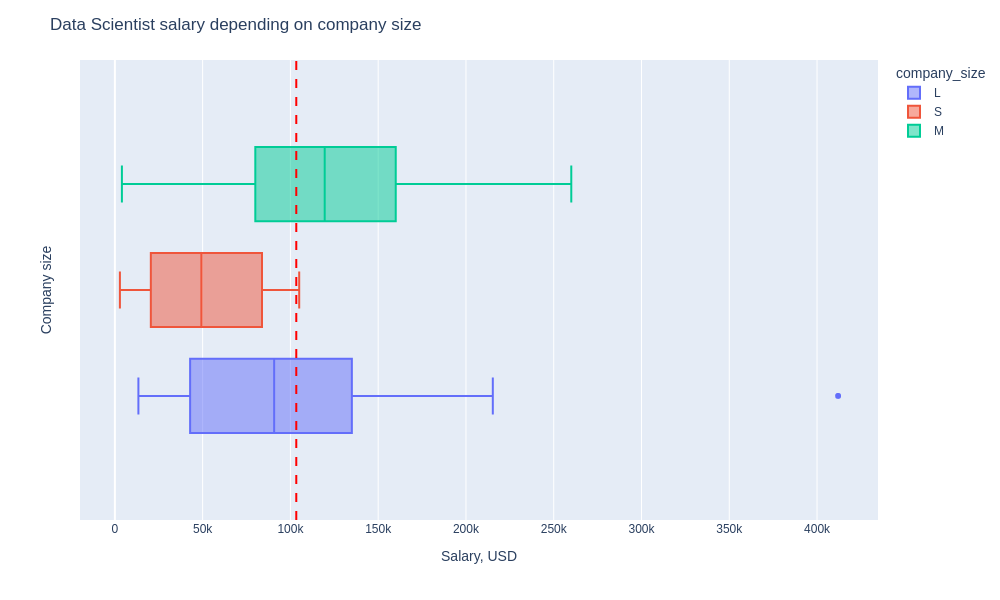

In [69]:
fig03 = px.box(
    ds_data,
    x='salary_in_usd',
    color='company_size',
    points='outliers'
)

fig03.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text=f"Data Scientist salary depending on company size"
)

fig03.add_vline(ds_data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig03.update_xaxes(title_text="Salary, USD")

fig03.update_yaxes(title_text="Company size")
fig03.update(layout_showlegend=True)
fig03.write_image('images/ds_size.png')
fig03.show('png')

In [70]:
ds_small = ds_data[ds_data['company_size'] == 'S']['salary_in_usd']
ds_medium = ds_data[ds_data['company_size'] == 'M']['salary_in_usd']
ds_large = ds_data[ds_data['company_size'] == 'L']['salary_in_usd']

dec0 = decision_normality(stats.shapiro(ds_small)[1])
dec1 = decision_normality(stats.shapiro(ds_large)[1])
dec2 = decision_normality(stats.shapiro(ds_medium)[1])

if (dec0 and dec1 and dec2):
        print('\nAll samples have normal distribution.')
        print('Variance equality test')
        
        if (variance_equality(stats.levene(ds_small, ds_medium, ds_large)[1])):
            print('Variances are equal. Perform ANOVA test:')
            decision_hypothesis(stats.f_oneway(ds_small, ds_medium, ds_large)[1])
        else:
            print('Variances are not equal. Perform Kruskal-Wallace test:')
            decision_hypothesis(stats.kruskal(ds_small, ds_medium, ds_large)[1])
    
else:
    print('\nOne or more samples is not distributed normally. Perform Kruskal-Wallace test:')
    decision_hypothesis(stats.kruskal(ds_small, ds_medium, ds_large)[1])


p-value - 0.189
p-value is greater than significance level 0.05. Distribution is normal.
p-value - 0.000
p-value is less than significance level 0.05. Distribution is not normal.
p-value - 0.897
p-value is greater than significance level 0.05. Distribution is normal.

One or more samples is not distributed normally. Perform Kruskal-Wallace test:
p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.


Salaries in companies of different sizes are different.

In [71]:
if (dec0 and dec1):
        print('\nBoth samples have normal distribution. Perform 2-sample t-criterium test:')
        print('Variance equality test')
        
        if (variance_equality(stats.levene(ds_small, ds_large)[1])):
            decision_hypothesis(stats.ttest_ind(ds_small, ds_large, alternative='less', equal_var=True)[1])
        else:
            decision_hypothesis(stats.ttest_ind(ds_small, ds_large, alternative='less', equal_var=False)[1])
    
else:
    print('\nOne of samples is not distributed normally. Perform U-test Mann-Whitney:')
    decision_hypothesis(stats.mannwhitneyu(ds_small, ds_large, alternative='less')[1])


One of samples is not distributed normally. Perform U-test Mann-Whitney:
p-value - 0.001
p-value is less than significance level 0.05. Decline null hypothesis.


In [72]:
if (dec1 and dec2):
        print('\nBoth samples have normal distribution. Perform 2-sample t-criterium test:')
        print('Variance equality test')
        
        if (variance_equality(stats.levene(ds_medium, ds_large)[1])):
            decision_hypothesis(stats.ttest_ind(ds_medium, ds_large, alternative='greater', equal_var=True)[1])
        else:
            decision_hypothesis(stats.ttest_ind(ds_medium, ds_large, alternative='greater', equal_var=False)[1])
    
else:
    print('\nOne of samples is not distributed normally. Perform U-test Mann-Whitney:')
    decision_hypothesis(stats.mannwhitneyu(ds_medium, ds_large, alternative='greater')[1])


One of samples is not distributed normally. Perform U-test Mann-Whitney:
p-value - 0.024
p-value is less than significance level 0.05. Decline null hypothesis.


Salaries in medium-size companies are greater than salaries in large companies. Salaries in large companies are greater than salaries in small companies.

### Is there a link between Data Scientist and Data Engineer job presence and company size?

Visual comparison

In [73]:
data_cp = data.copy()
data_cp['is_ds'] = data_cp['job_title'].apply(lambda x: 'ds' if x == 'Data Scientist' else 'not ds')
data_cp['is_de'] = data_cp['job_title'].apply(lambda x: 'de' if x == 'Data Engineer' else 'not de')

ds_size = data_cp.pivot_table(
    values= 'salary_in_usd',
    index='company_size',
    columns='is_ds',
    aggfunc='count'
)
display(ds_size)

de_size = data_cp.pivot_table(
    values= 'salary_in_usd',
    index='company_size',
    columns='is_de',
    aggfunc='count'
)
display(de_size)

is_ds,ds,not ds
company_size,,
L,43,150
M,66,224
S,21,61


is_de,de,not de
company_size,,
L,34,159
M,81,209
S,6,76


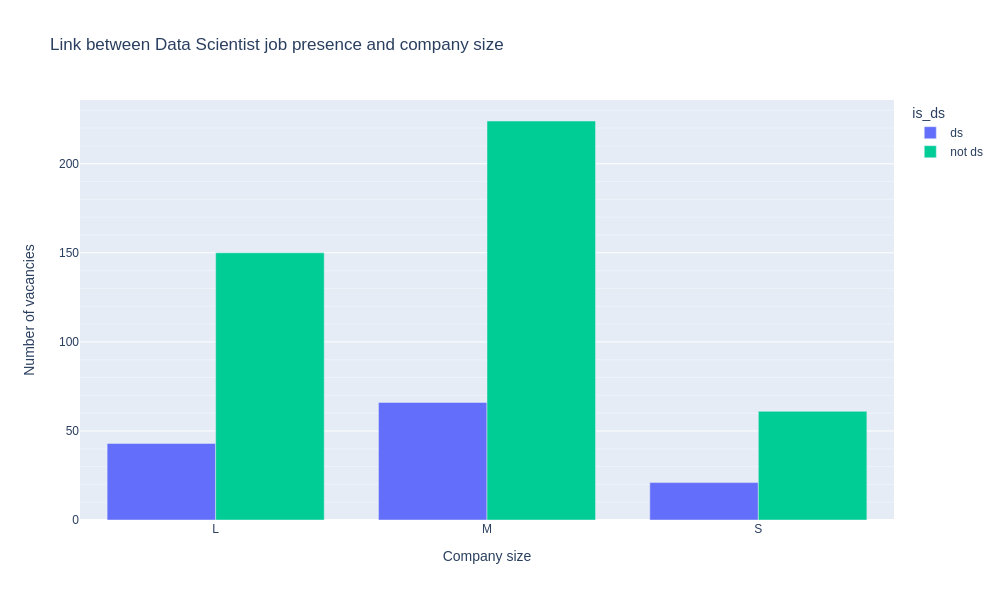

In [74]:
fig_ds_size = px.bar(
    ds_size,
    y=ds_size.columns,
    x=ds_size.index,
    color='is_ds',
    category_orders={'is_ds': ['ds', 'not_ds']},
    orientation='v',
    height=600,
    width=1000,
    title='Link between Data Scientist job presence and company size'
)
fig_ds_size.update_yaxes(minor_showgrid=True)
fig_ds_size.layout.xaxis.title.text = 'Company size'
fig_ds_size.layout.yaxis.title.text = 'Number of vacancies'
fig_ds_size.update_layout(legend_title='is_ds', barmode='group')
fig_ds_size.write_image('images/ds_job_size.png')
fig_ds_size.show('png')

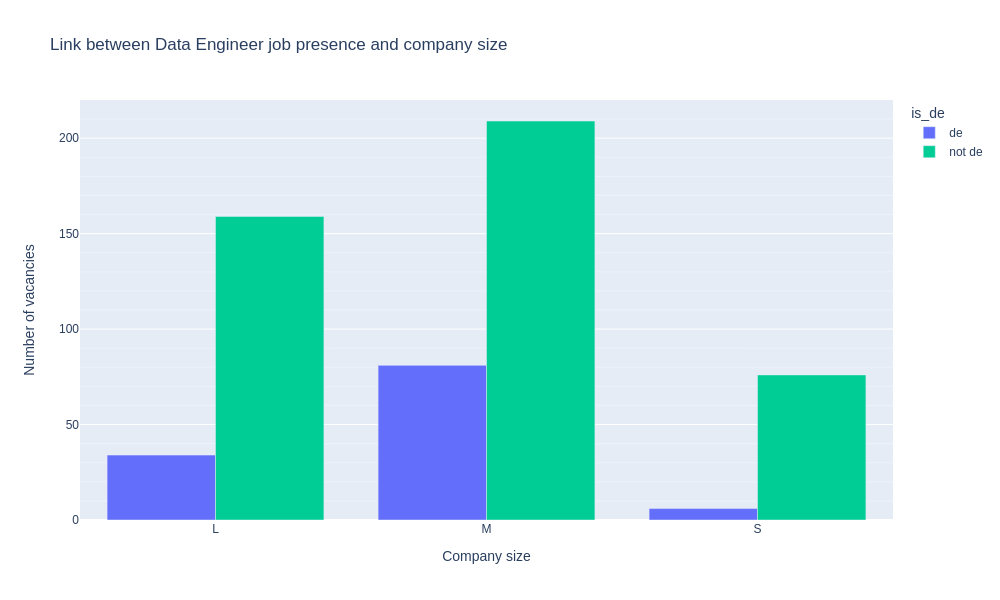

In [75]:
fig_de_size = px.bar(
    de_size,
    y=de_size.columns,
    x=de_size.index,
    color='is_de',
    category_orders={'is_de': ['de', 'not_de']},
    orientation='v',
    height=600,
    width=1000,
    title='Link between Data Engineer job presence and company size'
)
fig_de_size.update_yaxes(minor_showgrid=True)
fig_de_size.layout.xaxis.title.text = 'Company size'
fig_de_size.layout.yaxis.title.text = 'Number of vacancies'
fig_de_size.update_layout(legend_title='is_de', barmode='group')
fig_de_size.write_image('images/de_job_size.png')
fig_de_size.show('png')

In [76]:
ds_crosstab = pd.crosstab(data_cp['company_size'], data_cp['is_ds'])
display(ds_crosstab)
decision_hypothesis(stats.chi2_contingency(ds_crosstab)[1])

de_crosstab = pd.crosstab(data_cp['company_size'], data_cp['is_de'])
display(de_crosstab)
decision_hypothesis(stats.chi2_contingency(de_crosstab)[1])


is_ds,ds,not ds
company_size,,
L,43,150
M,66,224
S,21,61


p-value - 0.826
p-value is greater than significance level 0.05. No reason to decline null hypothesis.


is_de,de,not de
company_size,,
L,34,159
M,81,209
S,6,76


p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.


True

The presence of Data Scientist job has no link with company size. On the contrary, the presence of Data Engineer job has such link.

***

## Additional explorations

### How do Data Scientist salaries depend on remote ratio?

Visual comparison.

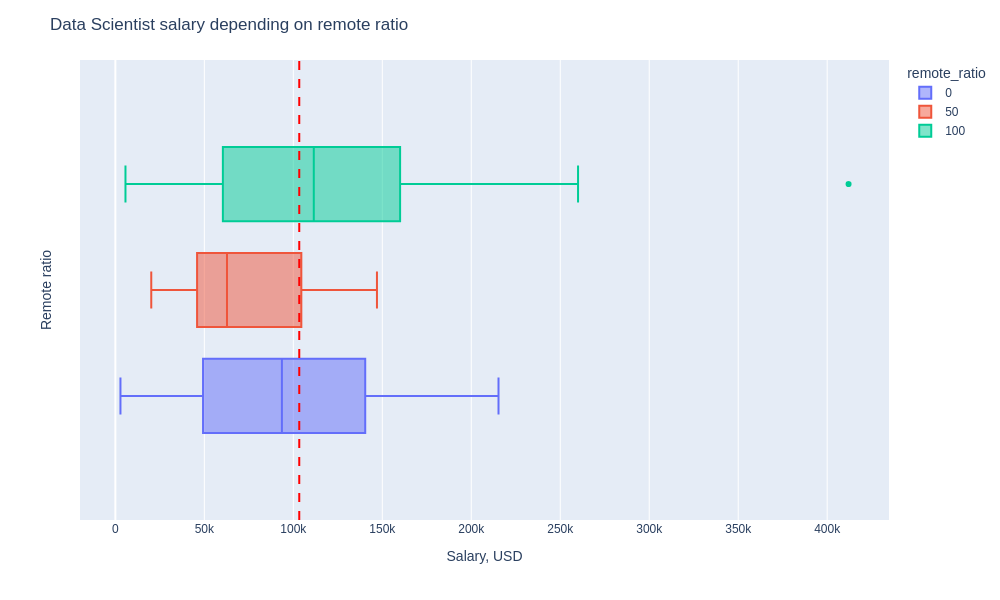

In [77]:
fig04 = px.box(
    ds_data,
    x='salary_in_usd',
    color='remote_ratio',
    points='outliers'
)

fig04.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text=f"Data Scientist salary depending on remote ratio"
)

fig04.add_vline(ds_data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig04.update_xaxes(title_text="Salary, USD")

fig04.update_yaxes(title_text="Remote ratio")
fig04.update(layout_showlegend=True)
fig04.write_image('images/ds_remote_ratio.png')
fig04.show('png')

In [78]:
rr0 = ds_data[ds_data['remote_ratio'] == 0]['salary_in_usd']
rr50 = ds_data[ds_data['remote_ratio'] == 50]['salary_in_usd']
rr100 = ds_data[ds_data['remote_ratio'] == 100]['salary_in_usd']

print(f'For remote ratio 0: ')
dec0 = decision_normality(stats.shapiro(rr0)[1])
print(f'For remote ratio 50: ')
dec50 = decision_normality(stats.shapiro(rr50)[1])
print(f'For remote ratio 100: ')
dec100 = decision_normality(stats.shapiro(rr100)[1])

if (dec0 and dec50 and dec100):
        print('\nAll samples have normal distribution.')
        print('Variance equality test')
        
        if (variance_equality(stats.levene(rr0, rr50, rr100)[1])):
            print('Variances are equal. Perform ANOVA test:')
            decision_hypothesis(stats.f_oneway(rr0, rr50, rr100)[1])
        else:
            print('Variances are not equal. Perform Kruskal-Wallace test:')
            decision_hypothesis(stats.kruskal(rr0, rr50, rr100)[1])
    
else:
    print('\nOne or more samples is not distributed normally. Perform Kruskal-Wallace test:')
    decision_hypothesis(stats.kruskal(rr0, rr50, rr100)[1])

For remote ratio 0: 
p-value - 0.331
p-value is greater than significance level 0.05. Distribution is normal.
For remote ratio 50: 
p-value - 0.387
p-value is greater than significance level 0.05. Distribution is normal.
For remote ratio 100: 
p-value - 0.001
p-value is less than significance level 0.05. Distribution is not normal.

One or more samples is not distributed normally. Perform Kruskal-Wallace test:
p-value - 0.020
p-value is less than significance level 0.05. Decline null hypothesis.


Salaries with different remote ratio differ.

In [79]:
if (dec0 and dec50):
        print('\nBoth samples have normal distribution. Perform 2-sample t-criterium test:')
        print('Variance equality test')
        
        if (variance_equality(stats.levene(rr0, rr50)[1])):
            decision_hypothesis(stats.ttest_ind(rr0, rr50, alternative='greater', equal_var=True)[1])
        else:
            decision_hypothesis(stats.ttest_ind(rr0, rr50, alternative='greater', equal_var=False)[1])
    
else:
    print('\nOne of samples is not distributed normally. Perform U-test Mann-Whitney:')
    decision_hypothesis(stats.mannwhitneyu(rr0, rr50, alternative='greater')[1])


Both samples have normal distribution. Perform 2-sample t-criterium test:
Variance equality test
p-value - 0.031
p-value is less than significance level 0.05. Variances aren't equal.
p-value - 0.023
p-value is less than significance level 0.05. Decline null hypothesis.


Salaries with remote ratio 0 are greater than those with remote ratio 50.

In [80]:
if (dec0 and dec100):
        print('\nBoth samples have normal distribution. Perform 2-sample t-criterium test:')
        print('Variance equality test')
        
        if (variance_equality(stats.levene(rr0, rr100)[1])):
            decision_hypothesis(stats.ttest_ind(rr0, rr100, alternative='less', equal_var=True)[1])
        else:
            decision_hypothesis(stats.ttest_ind(rr0, rr100, alternative='less', equal_var=False)[1])
    
else:
    print('\nOne of samples is not distributed normally. Perform U-test Mann-Whitney:')
    decision_hypothesis(stats.mannwhitneyu(rr0, rr100, alternative='less')[1])


One of samples is not distributed normally. Perform U-test Mann-Whitney:
p-value - 0.117
p-value is greater than significance level 0.05. No reason to decline null hypothesis.


We can't conclude that salaries with remote ratio 0 less than those with remote ratio 100.

In [81]:
if (dec50 and dec100):
        print('\nBoth samples have normal distribution. Perform 2-sample t-criterium test:')
        print('Variance equality test')
        
        if (variance_equality(stats.levene(rr50, rr100)[1])):
            decision_hypothesis(stats.ttest_ind(rr50, rr100, alternative='less', equal_var=True)[1])
        else:
            decision_hypothesis(stats.ttest_ind(rr50, rr100, alternative='less', equal_var=False)[1])
    
else:
    print('\nOne of samples is not distributed normally. Perform U-test Mann-Whitney:')
    decision_hypothesis(stats.mannwhitneyu(rr50, rr100, alternative='less')[1])


One of samples is not distributed normally. Perform U-test Mann-Whitney:
p-value - 0.003
p-value is less than significance level 0.05. Decline null hypothesis.


Salaries with remote ratio 50 less than those with remote ratio 100.

### How do Data Scientist salaries depend on level of experience?

Visual comparison.

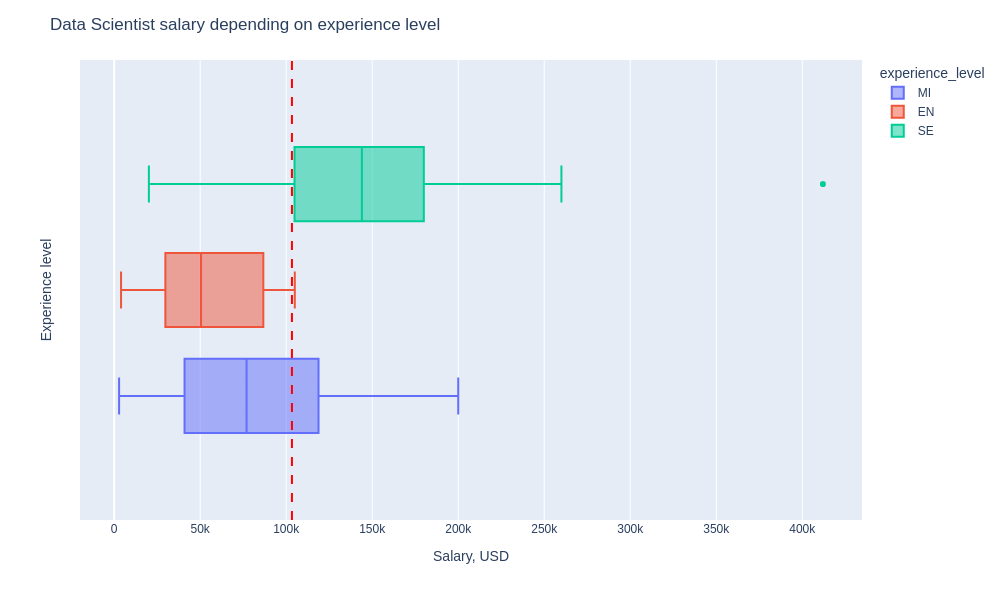

In [82]:
fig05 = px.box(
    ds_data,
    x='salary_in_usd',
    color='experience_level',
    points='outliers'
)

fig05.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title_text=f"Data Scientist salary depending on experience level"
)

fig05.add_vline(ds_data['salary_in_usd'].mean(), line_width=2, line_dash="dash", line_color="red")
fig05.update_xaxes(title_text="Salary, USD")

fig05.update_yaxes(title_text="Experience level")
fig05.update(layout_showlegend=True)
fig05.write_image('images/ds_exp.png')
fig05.show('png')

Executive-level employees don't participate in the test due to their insufficient number.

In [83]:
en = ds_data[ds_data['experience_level'] == 'EN']['salary_in_usd']
mi = ds_data[ds_data['experience_level'] == 'MI']['salary_in_usd']
se = ds_data[ds_data['experience_level'] == 'SE']['salary_in_usd']

print(f'For entry experience level: ')
dec_en = decision_normality(stats.shapiro(en)[1])
print(f'For middle experience level: ')
dec_mi = decision_normality(stats.shapiro(mi)[1])
print(f'For senior experience level: ')
dec_se = decision_normality(stats.shapiro(se)[1])

if (dec_en and dec_mi and dec_se):
        print('\nAll samples have normal distribution.')
        print('Variance equality test')
        
        if (variance_equality(stats.levene(en, mi, se)[1])):
            print('Variances are equal. Perform ANOVA test:')
            decision_hypothesis(stats.f_oneway(en, mi, se)[1])
        else:
            print('Variances are not equal. Perform Kruskal-Wallace test:')
            decision_hypothesis(stats.kruskal(en, mi, se)[1])
    
else:
    print('\nOne or more samples is not distributed normally. Perform Kruskal-Wallace test:')
    decision_hypothesis(stats.kruskal(en, mi, se)[1])

For entry experience level: 
p-value - 0.174
p-value is greater than significance level 0.05. Distribution is normal.
For middle experience level: 
p-value - 0.146
p-value is greater than significance level 0.05. Distribution is normal.
For senior experience level: 
p-value - 0.002
p-value is less than significance level 0.05. Distribution is not normal.

One or more samples is not distributed normally. Perform Kruskal-Wallace test:
p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.


Salary value depends on experience level.

In [84]:
if (dec_en and dec_mi):
        print('\nBoth samples have normal distribution. Perform 2-sample t-criterium test:')
        print('Variance equality test')
        
        if (variance_equality(stats.levene(en, mi)[1])):
            decision_hypothesis(stats.ttest_ind(en, mi, alternative='less', equal_var=True)[1])
        else:
            decision_hypothesis(stats.ttest_ind(en, mi, alternative='less', equal_var=False)[1])
    
else:
    print('\nOne of samples is not distributed normally. Perform U-test Mann-Whitney:')
    decision_hypothesis(stats.mannwhitneyu(en, mi, alternative='less')[1])


Both samples have normal distribution. Perform 2-sample t-criterium test:
Variance equality test
p-value - 0.025
p-value is less than significance level 0.05. Variances aren't equal.
p-value - 0.002
p-value is less than significance level 0.05. Decline null hypothesis.


Entry level salary is less than that of mid-level.

In [85]:
if (dec_se and dec_mi):
        print('\nBoth samples have normal distribution. Perform 2-sample t-criterium test:')
        print('Variance equality test')
        
        if (variance_equality(stats.levene(mi, se)[1])):
            decision_hypothesis(stats.ttest_ind(mi, se, alternative='less', equal_var=True)[1])
        else:
            decision_hypothesis(stats.ttest_ind(mi, se, alternative='less', equal_var=False)[1])
    
else:
    print('\nOne of samples is not distributed normally. Perform U-test Mann-Whitney:')
    decision_hypothesis(stats.mannwhitneyu(mi, se, alternative='less')[1])


One of samples is not distributed normally. Perform U-test Mann-Whitney:
p-value - 0.000
p-value is less than significance level 0.05. Decline null hypothesis.


Mid-level salary is less than senior level salary.

***

## Conclusion

* All presented features have their impact on salary in USD.

* Data Scientist salaries have no persistent annual growth.

* There's no significant difference between Data Scientist and Data Engineer salaries in 2022.

* Company size does affect Data Scientist salary. Salaries in medium-size companies are greater than those in large companies. Salaries in large companies are greater than those in small companies.

* There's no link between Data Scientist vacancy presence and company size. However, in case of Data Engineer vacancy such link exists.

* Salaries in companies with almost absent remote work are greater than those with partially remote work. There'no significant difference between salaries in companies with almost absent remote work and companies with almost entirely remote work. Salaries in companies with partially remote work are less than those with almost entirely remote work.

* Experience level in Data Science affects salary. Entry level salary is less than that of mid-level. Mid-level salary is less than senior level salary. Data on execute-level personnel was insufficient so that part of exploration was omitted.
